# Import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from cricket import Cricket

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Read Data Set

Group round = 1298135 - 1298146, 12 matches

Super 12 = 1298147 - 1298176, 27 matches (3 missing match: 1298155, 1298159, 1298160)

Semi Final = 1298177 - 1298178, 2 matches

Final = 1298179, 2 Match

In [2]:
df = pd.read_csv("T-20 World cup 2022.csv").set_index('match_id').drop(columns = ['comment_id', 'home_team', 'away_team'])

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9814 entries, 1298179 to 1298135
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_name         9814 non-null   object 
 1   current_innings    9814 non-null   object 
 2   innings_id         9814 non-null   int64  
 3   over               9814 non-null   int64  
 4   ball               9814 non-null   int64  
 5   runs               9814 non-null   int64  
 6   shortText          9814 non-null   object 
 7   isBoundary         9814 non-null   bool   
 8   isWide             9814 non-null   bool   
 9   isNoball           9814 non-null   bool   
 10  batsman1_id        9814 non-null   int64  
 11  batsman1_name      9814 non-null   object 
 12  batsman1_runs      9814 non-null   int64  
 13  batsman1_balls     9814 non-null   int64  
 14  bowler1_id         9814 non-null   int64  
 15  bowler1_name       9814 non-null   object 
 16  bowler1_overs      9

,match_name,current_innings,innings_id,over,ball,runs,shortText,isBoundary,isWide,isNoball,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls,bowler1_id,bowler1_name,bowler1_overs,bowler1_maidens,bowler1_runs,bowler1_wkts,batsman2_id,batsman2_name,batsman2_runs,batsman2_balls,bowler2_id,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1298179,ENG v PAK,PAK,1,1,1,0,"Stokes to Mohammad Rizwan, no run",False,False,False,323389,Mohammad Rizwan,0,2,311158,Ben Stokes,0.1,0,2,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1298179,ENG v PAK,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 wide",False,True,False,323389,Mohammad Rizwan,0,1,311158,Ben Stokes,0.0,0,2,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
1298179,ENG v PAK,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 no ball",False,False,True,323389,Mohammad Rizwan,0,1,311158,Ben Stokes,0.0,0,1,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
1298179,ENG v PAK,PAK,1,1,2,2,"Stokes to Mohammad Rizwan, 2 runs",False,False,False,323389,Mohammad Rizwan,2,3,311158,Ben Stokes,0.2,0,4,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
1298179,ENG v PAK,PAK,1,1,3,0,"Stokes to Mohammad Rizwan, no run",False,False,False,323389,Mohammad Rizwan,2,4,311158,Ben Stokes,0.3,0,4,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


## Functions for plots

In [4]:
# Lineplot

def lineplot(x, y, title = "", xlabel = "", ylabel = "", label = "", scatterplot = True, **kwargs):
    plt.plot(x, y, label = label, **kwargs)
    if scatterplot:
        plt.scatter(x, y)
    # plt.grid(axis= 'x')
    for i, v in zip(x, y):
        plt.text(i, v, str(v), ha='center', **kwargs)

    plt.title(title, **kwargs)
    plt.xlabel(xlabel, **kwargs)
    plt.ylabel(ylabel, **kwargs)
    plt.tight_layout();

In [5]:
# horizontal bar

def hbarplot(y, width, title = "", xlabel = "", ylabel = "", **kwargs):
    plt.barh(y = y, width = width)
    # plt.grid(axis = 'x')
    for i, v in zip(y, width):
        plt.text(v + 0.1, i, str(v), va='center')
    
    plt.title(title, **kwargs)
    plt.xlabel(xlabel, **kwargs)
    plt.ylabel(ylabel, **kwargs)
    plt.tight_layout();

In [6]:
# barplot

def barplot(x, height, title = "", xlabel = "", ylabel = "", **kwargs):
    plt.bar(x = x, height = height)
    # plt.grid(axis = 'x')
    for i, v in zip(x, height):
        plt.text(i, v + 0.1, str(v), ha='center')
    
    plt.title(title, **kwargs)
    plt.xlabel(xlabel, **kwargs)
    plt.ylabel(ylabel, **kwargs)
    plt.tight_layout();

In [7]:
# Pie chart

def pieplot(x, labels, autopct= '%1.1f%%', title = "", **kwargs):
    plt.pie(x = x, labels=labels, autopct=autopct, **kwargs)
    plt.title(title);

# Instantiate the _'Cricket'_ class

In [8]:
from cricket import Cricket
group = Cricket(df, 'group')
group.info()

T20 World Cup: Group
Total Team in group round: 8
Teams: ['SCOT' 'ZIM' 'WI' 'IRE' 'UAE' 'NAM' 'SL' 'NED']
Total Match in group round: 12


## Run Timeline

### Run Timeline for all country

In [9]:
teams = ['SCOT', 'ZIM', 'WI', 'IRE', 'UAE', 'NAM', 'SL', 'NED']

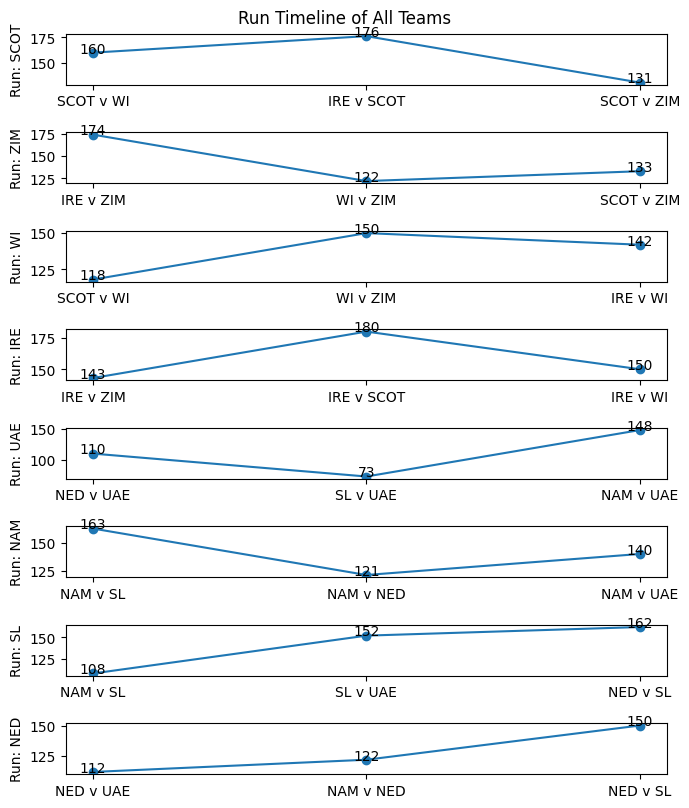

In [10]:
def team_run_timeline(team):
    timeline = group.team_run_timeline(team)  
    lineplot(timeline['match_name'], timeline['Run'], ylabel = f'Run: {team}')



plt.figure(figsize=(7, 16))
for i, team in enumerate(teams):
    plt.subplot(16, 1, i+1)
    team_run_timeline(team)
    plt.suptitle('Run Timeline of All Teams')

### Analysis of Run in T20 world cup 2022

In [11]:
team_run = group.team_run()
team_run

Run
match_id match_name Team     
1298135  NAM v SL   NAM   163
                    SL    108
1298136  NED v UAE  NED   112
                    UAE   110
1298137  SCOT v WI  SCOT  160
                    WI    118
1298138  IRE v ZIM  IRE   143
                    ZIM   174
1298139  NAM v NED  NAM   121
                    NED   122
1298140  SL v UAE   SL    152
                    UAE    73
1298141  IRE v SCOT IRE   180
                    SCOT  176
1298142  WI v ZIM   WI    150
                    ZIM   122
1298143  NED v SL   NED   150
                    SL    162
1298144  NAM v UAE  NAM   140
                    UAE   148
1298145  IRE v WI   IRE   150
                    WI    142
1298146  SCOT v ZIM SCOT  131
                    ZIM   133

In [12]:
most_run_innings_player = group.most_run_innings_player().head()
most_run_innings_player

,Match,Innings,Batsman,Balls,Runs,Strk rate
9,IRE v SCOT,SCOT,Michael Jones,55,86,156.36
39,IRE v ZIM,ZIM,Sikandar Raza,47,82,174.47
104,NED v SL,SL,Kusal Mendis,44,79,179.55
164,SL v UAE,SL,Pathum Nissanka,60,74,123.33
1,IRE v SCOT,IRE,Curtis Campher,32,72,225.00


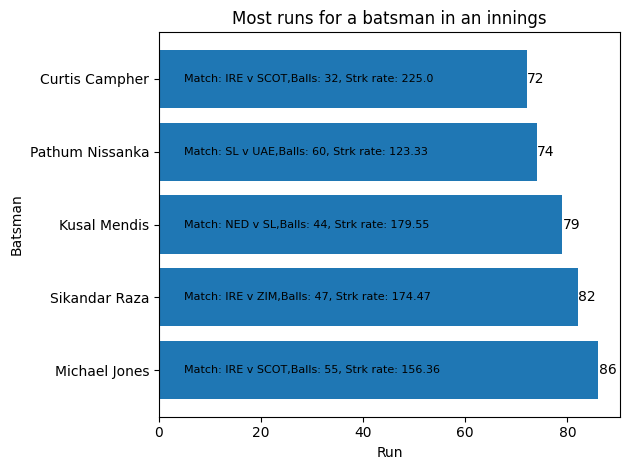

In [13]:
hbarplot(y = most_run_innings_player['Batsman'], width = most_run_innings_player['Runs'], title = 'Most runs for a batsman in an innings', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Match: {m},Balls: {b}, Strk rate: {sr}' for m, b, sr in zip(most_run_innings_player['Match'], most_run_innings_player['Balls'], most_run_innings_player['Strk rate'])]

for i, v in zip(most_run_innings_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [14]:
most_run_match_player = group.most_run_match_player().head()
most_run_match_player

,Match,Balls,Runs,Batsman,Strk rate
0,IRE v SCOT,55,86,Michael Jones,156.36
1,IRE v ZIM,47,82,Sikandar Raza,174.47
2,NED v SL,51,79,Kusal Mendis,154.90
3,SL v UAE,60,74,Pathum Nissanka,123.33
4,IRE v WI,48,66,George Munsey,137.50


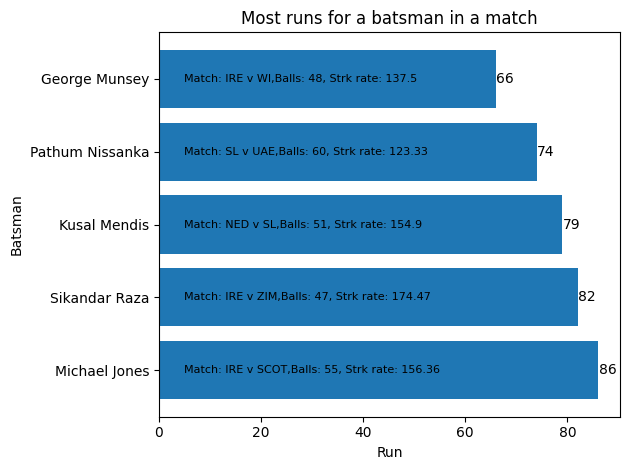

In [15]:
hbarplot(y = most_run_match_player['Batsman'], width = most_run_match_player['Runs'], title = 'Most runs for a batsman in a match', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Match: {m},Balls: {b}, Strk rate: {sr}' for m, b, sr in zip(most_run_match_player['Match'], most_run_match_player['Balls'], most_run_match_player['Strk rate'])]

for i, v in zip(most_run_match_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [16]:
most_run_team_player = group.most_run_team_player().head()
most_run_team_player

,Team,Balls,Batsman,Runs,Strk rate
7,ZIM,78,Wessly Madhevere,136,174.36
2,NED,104,Vikramjit Singh,129,124.04
3,SCOT,106,Richie Berrington,121,114.15
4,SL,91,Wanindu Hasaranga de Silva,103,113.19
1,NAM,93,Zane Green,101,108.60


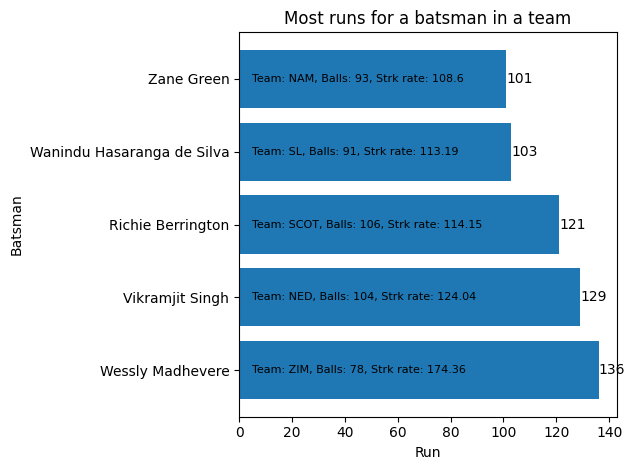

In [17]:
hbarplot(y = most_run_team_player['Batsman'], width = most_run_team_player['Runs'], title = 'Most runs for a batsman in a team', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Team: {t}, Balls: {b}, Strk rate: {sr}' for t, b, sr in zip(most_run_team_player['Team'], most_run_team_player['Balls'], most_run_team_player['Strk rate'])]

for i, v in zip(most_run_team_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [18]:
most_run_player = group.most_run_player().head()
most_run_player

,Team,Batsman,Balls,Runs,Strk rate
86,ZIM,Sikandar Raza,78,136,174.36
26,NED,Max O'Dowd,104,129,124.04
35,SCOT,George Munsey,106,121,114.15
38,SCOT,Michael Jones,77,110,142.86
48,SL,Kusal Mendis,63,103,163.49


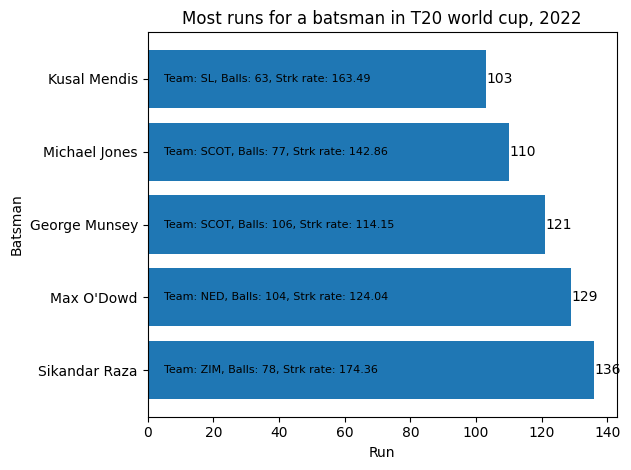

In [19]:
hbarplot(y = most_run_player['Batsman'], width = most_run_player['Runs'], title = 'Most runs for a batsman in T20 world cup, 2022', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Team: {t}, Balls: {b}, Strk rate: {sr}' for t, b, sr in zip(most_run_player['Team'], most_run_player['Balls'], most_run_player['Strk rate'])]

for i, v in zip(most_run_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [20]:
most_average_batsman = group.most_average_batsman()
most_average_batsman = most_average_batsman[most_average_batsman['Runs'] >= 100].head()
most_average_batsman

,Batsman,Team,Runs,Strk rate,Match,Avg
0,Sikandar Raza,ZIM,136,174.36,3,68.00
1,Max O'Dowd,NED,129,124.04,3,64.50
2,George Munsey,SCOT,121,114.15,3,60.50
3,Michael Jones,SCOT,110,142.86,3,36.67
4,Kusal Mendis,SL,103,163.49,3,34.33


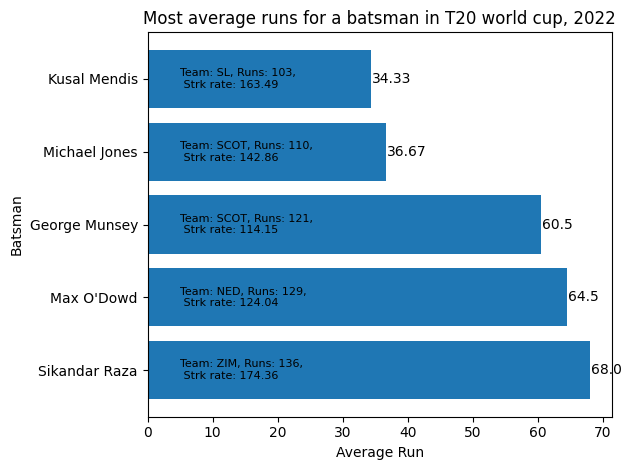

In [21]:
hbarplot(y = most_average_batsman['Batsman'], width = most_average_batsman['Avg'], title = 'Most average runs for a batsman in T20 world cup, 2022', xlabel = 'Average Run', ylabel = 'Batsman')
string = [f'Team: {t}, Runs: {r}, \n Strk rate: {b}' for t, r, b in zip(most_average_batsman['Team'], most_average_batsman['Runs'], most_average_batsman['Strk rate'])]

for i, v in zip(most_average_batsman['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

### Analysis of bowling in T20 world cup, 2022

In [22]:
most_wicket_innings_bowler = group.most_wicket_innings_bowler().head()
most_wicket_innings_bowler

,Match,Innings,Bowler,Wicket
91,WI v ZIM,ZIM,Alzarri Joseph,4
58,NED v UAE,UAE,Bas de Leede,3
83,SL v UAE,UAE,Dushmantha Chameera,3
16,IRE v ZIM,ZIM,Josh Little,3
67,SCOT v WI,WI,Mark Watt,3


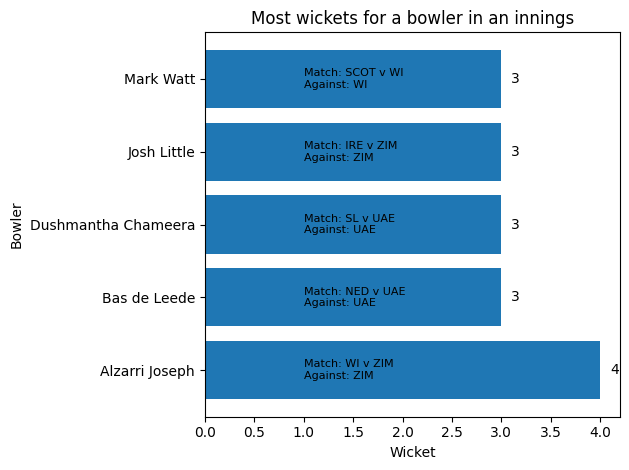

In [23]:
hbarplot(y = most_wicket_innings_bowler['Bowler'], width = most_wicket_innings_bowler['Wicket'], title = 'Most wickets for a bowler in an innings', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Match: {m}\nAgainst: {i}' for m, i in zip(most_wicket_innings_bowler['Match'], most_wicket_innings_bowler['Innings'])]

for i, v in zip(most_wicket_innings_bowler['Bowler'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 8})

In [24]:
most_wicket_match_bowler = group.most_wicket_match_bowler().head()
most_wicket_match_bowler

,Match,Bowler,Wicket
11,WI v ZIM,Sikandar Raza,4
1,IRE v WI,Simi Singh,3
2,IRE v ZIM,Tendai Chatara,3
6,NED v SL,Wanindu Hasaranga de Silva,3
7,NED v UAE,Zahoor Khan,3


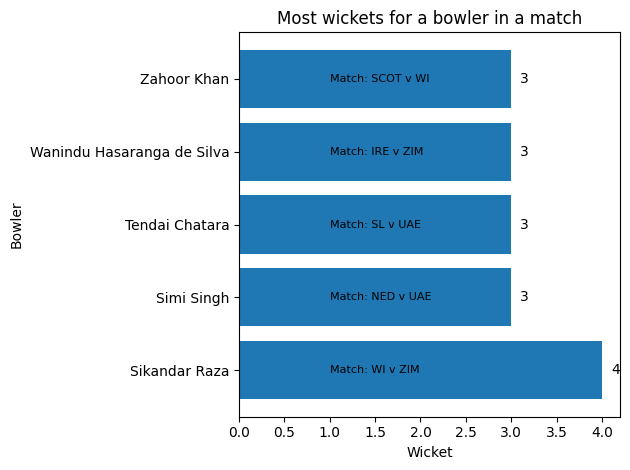

In [25]:
hbarplot(y = most_wicket_match_bowler['Bowler'], width = most_wicket_match_bowler['Wicket'], title = 'Most wickets for a bowler in a match', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Match: {m}' for m in most_wicket_innings_bowler['Match']]

for i, v in zip(most_wicket_match_bowler['Bowler'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 8})

In [26]:
most_wicket_bowler = group.most_wicket_bowler().head()
most_wicket_bowler

,Bowler,Wicket
46,Wanindu Hasaranga de Silva,7
5,Bas de Leede,7
2,Alzarri Joseph,6
10,Blessing Muzarabani,6
47,Zahoor Khan,5


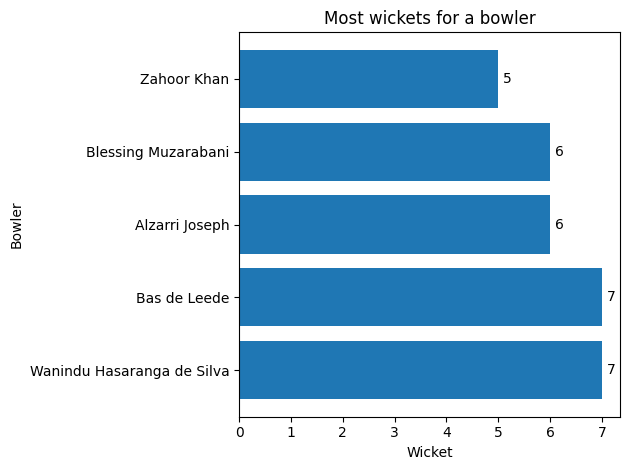

In [27]:
hbarplot(y = most_wicket_bowler['Bowler'], width = most_wicket_bowler['Wicket'], title = 'Most wickets for a bowler', xlabel = 'Wicket', ylabel = 'Bowler')

In [28]:
lowest_economy_bowler = group.lowest_economy_bowler()
# Bowled minimum 8 overs
lowest_economy_bowler = lowest_economy_bowler[lowest_economy_bowler['Over'] >= 8].head()
lowest_economy_bowler

,Bowler,Over,Wickets,Economy
0,Aayan Afzal Khan,8.0,2,4.75
61,Zahoor Khan,12.0,5,4.75
29,Jason Holder,10.2,5,4.80
57,Tim Pringle,10.0,2,5.00
9,Bernard Scholtz,12.0,4,5.08


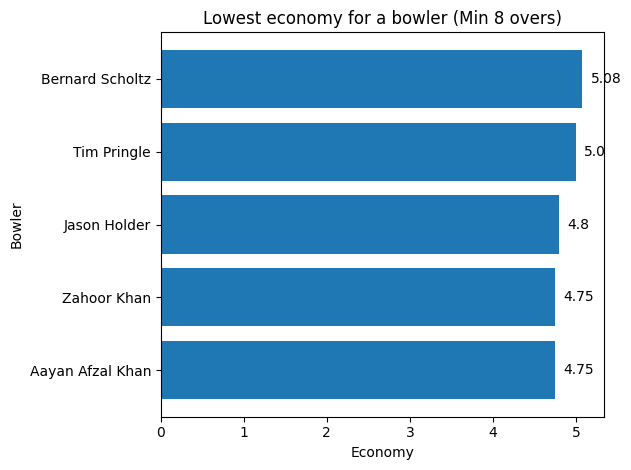

In [29]:
hbarplot(y = lowest_economy_bowler['Bowler'], width = lowest_economy_bowler['Economy'], title = 'Lowest economy for a bowler (Min 8 overs)', xlabel = 'Economy', ylabel = 'Bowler')

In [30]:
lowest_average_bowler = group.lowest_average_bowler()
lowest_average_bowler = lowest_average_bowler[lowest_average_bowler['Over'] >= 8].head()
lowest_average_bowler

,Bowler,Over,Wickets,Average
59,Wanindu Hasaranga de Silva,12.0,7,9.00
6,Bas de Leede,9.0,7,9.71
29,Jason Holder,10.2,5,9.80
61,Zahoor Khan,12.0,5,11.40
54,Sikandar Raza,11.0,5,12.20


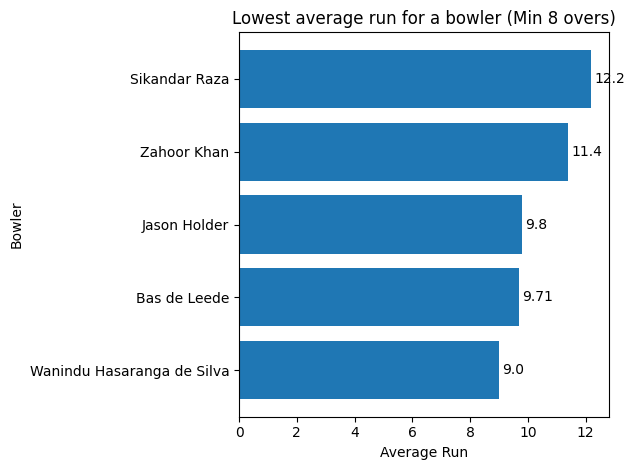

In [31]:
hbarplot(y = lowest_average_bowler['Bowler'], width = lowest_average_bowler['Average'], title = 'Lowest average run for a bowler (Min 8 overs)', xlabel = 'Average Run', ylabel = 'Bowler')

In [32]:
most_out_batsman = group.most_out_batsman().head()
most_out_batsman

,Batsman,Out,Match
33,Kusal Mendis,3.0,3
16,Dasun Shanaka,3.0,3
46,Pathum Nissanka,3.0,3
50,Richie Berrington,3.0,3
44,Nicholas Pooran,3.0,3


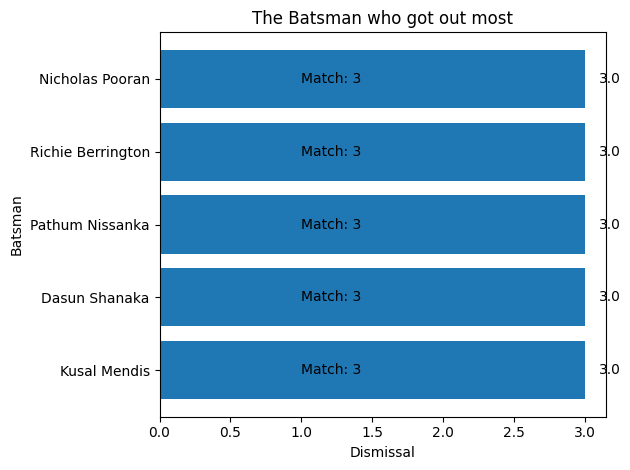

In [33]:
hbarplot(y = most_out_batsman['Batsman'], width = most_out_batsman['Out'], title = 'The Batsman who got out most', xlabel = 'Dismissal', ylabel = 'Batsman')
for i, v in zip(most_out_batsman['Batsman'], most_out_batsman['Match']):
    plt.text(1, i, f'Match: {str(v)}', va = 'center');

### Extra run analysis

who got most extra runs?

In [34]:
most_wide_run_innings_team = group.most_wide_run_innings_team().head()
most_wide_run_innings_team

,Match,Team,Wide
3,IRE v WI,WI,7
5,IRE v ZIM,ZIM,6
15,NED v UAE,UAE,6
0,IRE v SCOT,IRE,5
12,NED v SL,NED,5


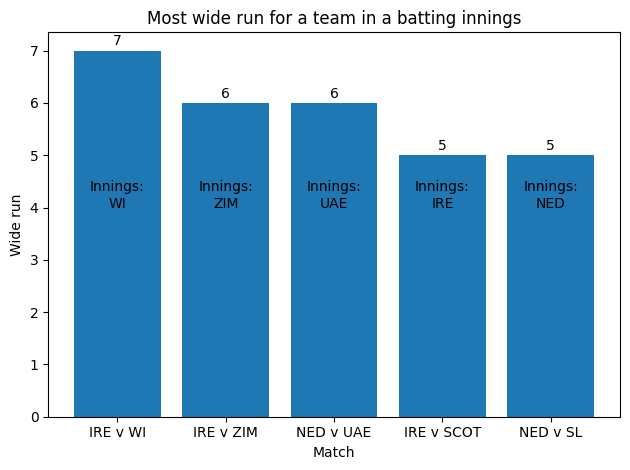

In [35]:
barplot(most_wide_run_innings_team['Match'], most_wide_run_innings_team['Wide'], 'Most wide run for a team in a batting innings', 'Match', 'Wide run')
for i, v in zip(most_wide_run_innings_team['Match'], most_wide_run_innings_team['Team']):
    plt.text(i, 4, f'Innings:\n{str(v)}', ha= 'center');

In [36]:
most_noball_run_innings_team = group.most_noball_run_innings_team().head()
most_noball_run_innings_team

,Match,Team,NoBall
0,IRE v SCOT,SCOT,1
1,IRE v WI,IRE,1
2,IRE v ZIM,IRE,1
3,NAM v NED,NED,1
4,NAM v UAE,NAM,1


In [37]:
# barplot(most_noball_run_innings_team['Match'], most_noball_run_innings_team['NoBall'], 'Most NoBall run for a team in a batting innings', 'Match', 'NoBall run')
# for i, v in zip(most_noball_run_innings_team['Match'], most_noball_run_innings_team['Team']):
#     plt.text(i, 0.2, f'Innings:\n{str(v)}', ha= 'center');

### Most Played analysis

In [38]:
most_played_team = group.most_played_team().head()
most_played_team

,Team,Matches,Match
0,IRE,"IRE v WI, IRE v SCOT, IRE v ZIM",3
1,NAM,"NAM v UAE, NAM v NED, NAM v SL",3
2,NED,"NED v SL, NAM v NED, NED v UAE",3
3,SCOT,"SCOT v ZIM, IRE v SCOT, SCOT v WI",3
4,SL,"NED v SL, SL v UAE, NAM v SL",3


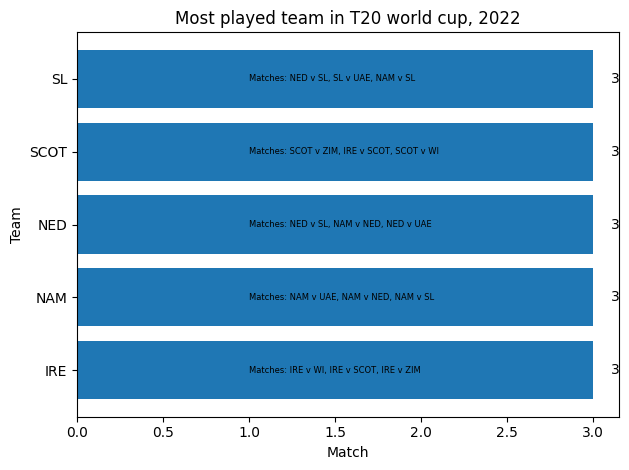

In [39]:
hbarplot(y = most_played_team['Team'], width = most_played_team['Match'], title = 'Most played team in T20 world cup, 2022', xlabel = 'Match', ylabel = 'Team')
string = [f'Matches: {m}' for m in most_played_team['Matches']]

for i, v in zip(most_played_team['Team'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 6})

In [40]:
most_played_batsman = group.most_played_batsman().head()
most_played_batsman

,Batsman,Matches,Match
45,Kusal Mendis,"NED v SL, SL v UAE, NAM v SL",3
36,Jan Frylinck,"NAM v UAE, NAM v NED, NAM v SL",3
25,Dhananjaya de Silva,"NED v SL, SL v UAE, NAM v SL",3
67,Richie Berrington,"SCOT v ZIM, IRE v SCOT, SCOT v WI",3
28,Evin Lewis,"IRE v WI, WI v ZIM, SCOT v WI",3


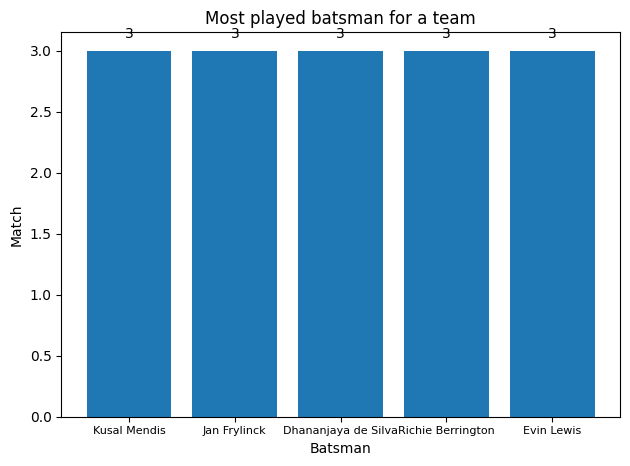

In [41]:
barplot(most_played_batsman['Batsman'], most_played_batsman['Match'], 'Most played batsman for a team', 'Batsman', 'Match')
plt.xticks(fontsize = 8);

In [42]:
most_played_bowler = group.most_played_bowler().head()
most_played_bowler

,Bowler,Matches,Match
0,Aayan Afzal Khan,"NAM v UAE, SL v UAE, NED v UAE",3
26,JJ Smit,"NAM v UAE, NAM v NED, NAM v SL",3
29,Jason Holder,"IRE v WI, WI v ZIM, SCOT v WI",3
30,Josh Davey,"SCOT v ZIM, IRE v SCOT, SCOT v WI",3
32,Junaid Siddique,"NAM v UAE, SL v UAE, NED v UAE",3


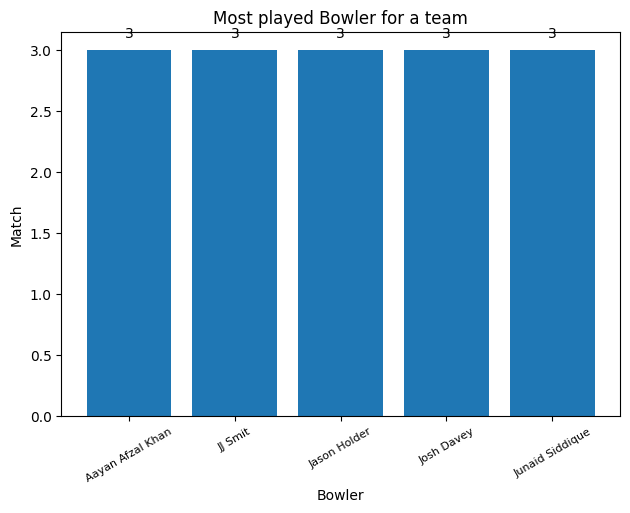

In [43]:
barplot(most_played_bowler['Bowler'], most_played_bowler['Match'], 'Most played Bowler for a team', 'Bowler', 'Match')
plt.xticks(rotation = 30, fontsize = 8);

### Most Winning Teams

In [44]:
most_winning_team = group.most_winning_team()
most_winning_team

,Team,Wins
0,NED,2
1,ZIM,2
2,SL,2
3,IRE,2
4,NAM,1
5,SCOT,1
6,WI,1
7,UAE,1


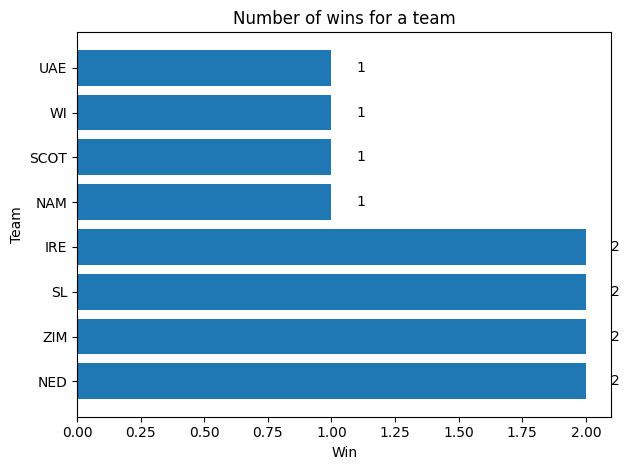

In [45]:
hbarplot(y = most_winning_team['Team'], width = most_winning_team['Wins'], title = 'Number of wins for a team', xlabel = 'Win', ylabel = 'Team')

### Who wins the most? Before batting or after batting?

In [46]:
most_winning_innings = group.most_winning_innings()
most_winning_innings

,Innings_No.,Wins,win %
0,1,7,58.33
1,2,5,41.67


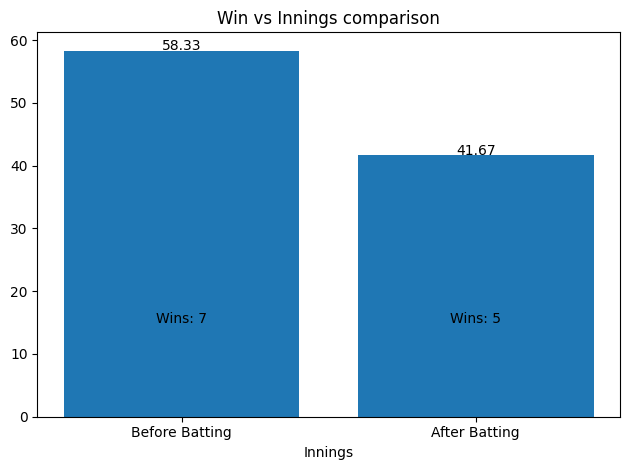

In [47]:
barplot(x = most_winning_innings['Innings_No.'], height = most_winning_innings['win %'], title = 'Win vs Innings comparison', xlabel = 'Innings')
plt.xticks(most_winning_innings['Innings_No.'], ['Before Batting', 'After Batting'])
for i, v in zip(most_winning_innings['Innings_No.'], most_winning_innings['Wins']):
    plt.text(i, 15, f'Wins: {str(v)}', ha = 'center');

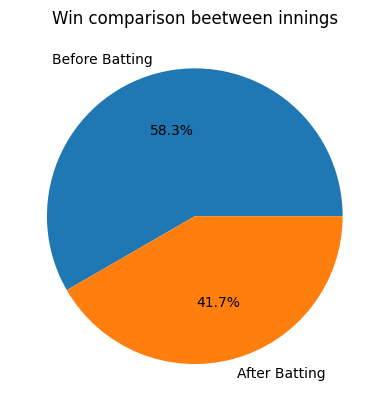

In [48]:
pieplot(most_winning_innings['Wins'], labels=['Before Batting', 'After Batting'], title= 'Win comparison beetween innings')

In [49]:
most_win_match_ratio = group.most_win_match_ratio().head()
most_win_match_ratio

,Team,Match,Wins,Ratio %
0,IRE,3,2,66.67
2,NED,3,2,66.67
4,SL,3,2,66.67
7,ZIM,3,2,66.67
1,NAM,3,1,33.33


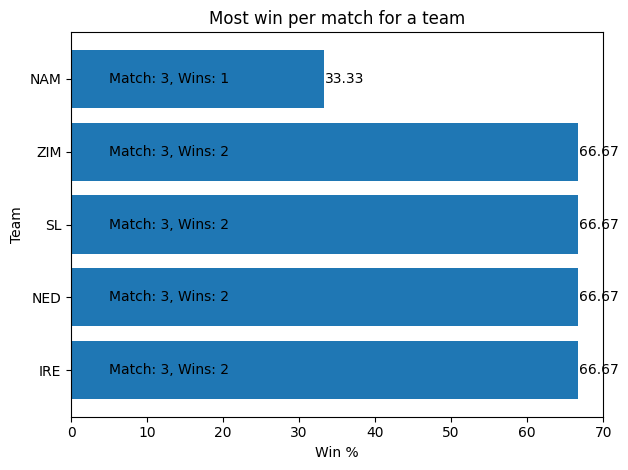

In [50]:
hbarplot(y = most_win_match_ratio['Team'], width = most_win_match_ratio['Ratio %'], title = 'Most win per match for a team', xlabel = 'Win %', ylabel = 'Team')
string = [f'Match: {m}, Wins: {w}' for m, w in zip(most_win_match_ratio['Match'], most_win_match_ratio['Wins'])]

for i, v in zip(most_win_match_ratio['Team'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 10})

### Most Fours

In [51]:
most_fours_innings = group.most_fours_innings().head()
most_fours_innings

,match_name,Innings,Fours
16,SCOT v WI,SCOT,18
0,IRE v SCOT,IRE,17
1,IRE v SCOT,SCOT,16
5,IRE v ZIM,ZIM,14
12,NED v SL,NED,13


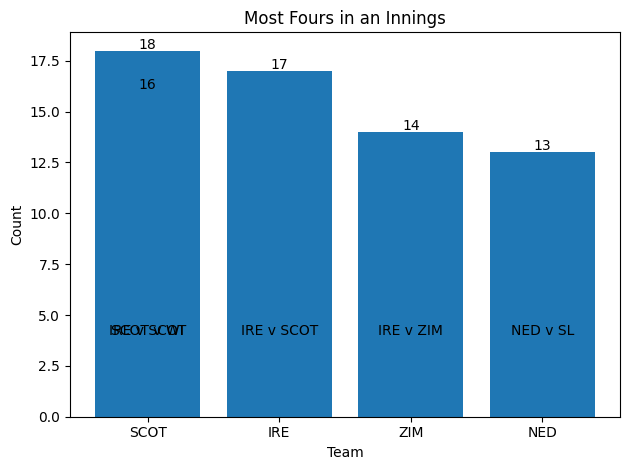

In [52]:
# most_fours_innings = most_fours_innings.head(5)

barplot(most_fours_innings['Innings'], most_fours_innings['Fours'], 'Most Fours in an Innings', 'Team', 'Count')
for i, v in zip(most_fours_innings['Innings'], most_fours_innings['match_name']):
    plt.text(i, 4, str(v), ha = 'center');

In [53]:
most_fours_team = group.most_fours_team().head()
most_fours_team

,Team,Fours
3,SCOT,45
0,IRE,37
7,ZIM,35
6,WI,30
4,SL,28


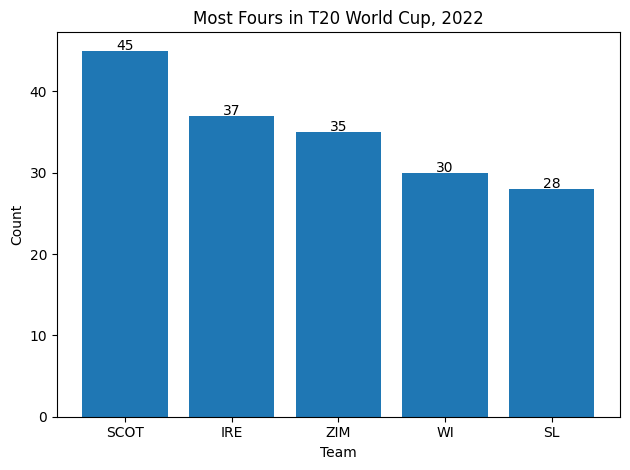

In [54]:
# most_fours_team = most_fours_team.head(5)
barplot(most_fours_team['Team'], most_fours_team['Fours'], 'Most Fours in T20 World Cup, 2022', 'Team', 'Count')

In [55]:
most_fours_match = group.most_fours_match().head()
most_fours_match

,Match,Fours
0,IRE v SCOT,33
8,SCOT v WI,29
2,IRE v ZIM,23
6,NED v SL,23
1,IRE v WI,21


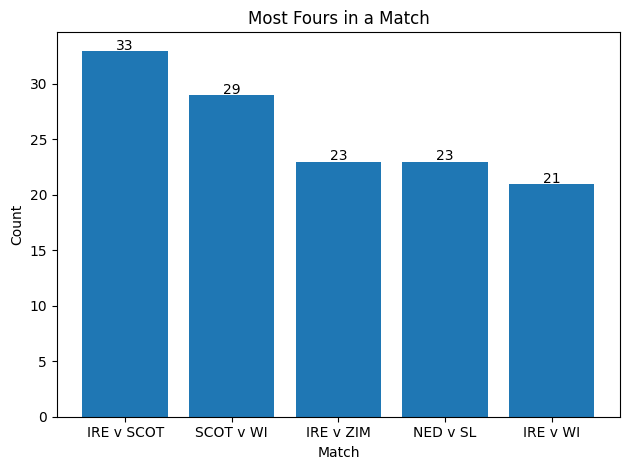

In [56]:
# most_fours_match = most_fours_match.head(5)

barplot(most_fours_match['Match'], most_fours_match['Fours'], 'Most Fours in a Match', 'Match', 'Count')

In [57]:
most_fours_innings_player = group.most_fours_innings_player().head()
most_fours_innings_player

,match_name,Innings,Batsman,Fours
70,SCOT v WI,SCOT,George Munsey,9
1,IRE v SCOT,IRE,Curtis Campher,7
77,SCOT v ZIM,SCOT,George Munsey,7
55,NED v SL,NED,Max O'Dowd,7
7,IRE v SCOT,SCOT,Michael Jones,6


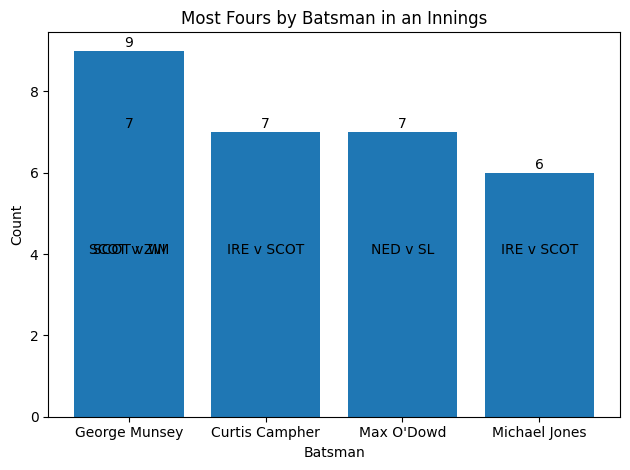

In [58]:
barplot(most_fours_innings_player['Batsman'], most_fours_innings_player['Fours'], 'Most Fours by Batsman in an Innings', 'Batsman', 'Count')
for i, v in zip(most_fours_innings_player['Batsman'], most_fours_innings_player['match_name']):
    plt.text(i, 4, str(v), ha = 'center');

In [59]:
most_fours_team_player = group.most_fours_team_player().head()
most_fours_team_player

,Team,Batsman,Fours
3,SCOT,Richie Berrington,16
2,NED,Vikramjit Singh,11
6,WI,Rovman Powell,9
7,ZIM,Wessly Madhevere,9
0,IRE,Paul Stirling,8


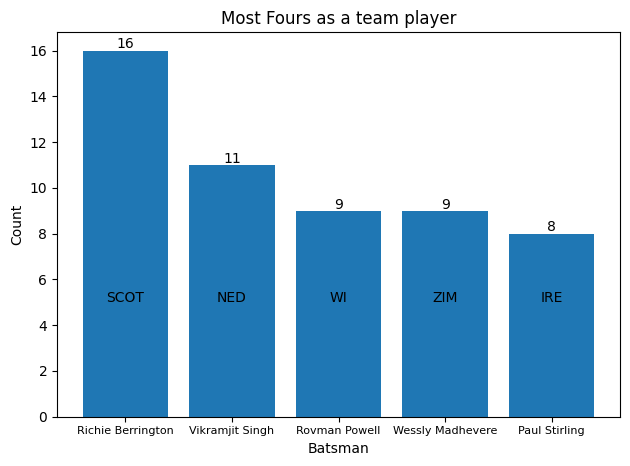

In [60]:
barplot(most_fours_team_player['Batsman'], most_fours_team_player['Fours'], 'Most Fours as a team player', 'Batsman', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_fours_team_player['Batsman'], most_fours_team_player['Team']):
    plt.text(i, 5, str(v), ha = 'center');

In [61]:
most_fours_match_player = group.most_fours_match_player().head()
most_fours_match_player

,Match,Batsman,Fours
72,SCOT v WI,George Munsey,9
78,SCOT v ZIM,George Munsey,7
1,IRE v SCOT,Curtis Campher,7
58,NED v SL,Max O'Dowd,7
11,IRE v WI,Brandon King,6


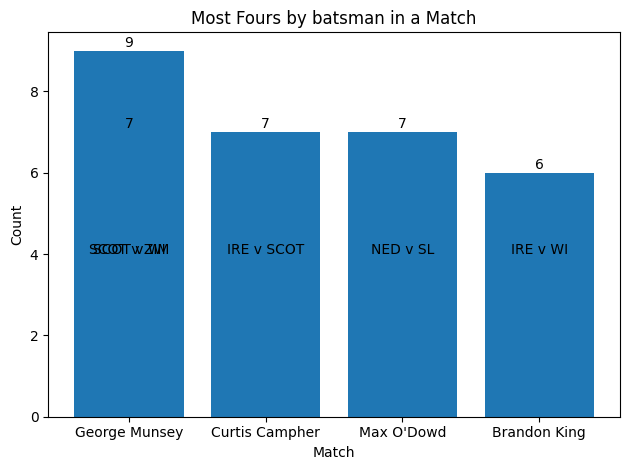

In [62]:
barplot(most_fours_match_player['Batsman'], most_fours_match_player['Fours'], 'Most Fours by batsman in a Match', 'Match', 'Count')
for i, v in zip(most_fours_match_player['Batsman'], most_fours_match_player['Match']):
    plt.text(i, 4, str(v), ha = 'center');

## Most Sixes

In [63]:
most_sixes_innings = group.most_sixes_innings().head()
most_sixes_innings

,match_name,Innings,Sixes
13,NED v SL,SL,7
2,IRE v WI,IRE,7
11,NAM v UAE,UAE,6
5,IRE v ZIM,ZIM,6
3,IRE v WI,WI,5


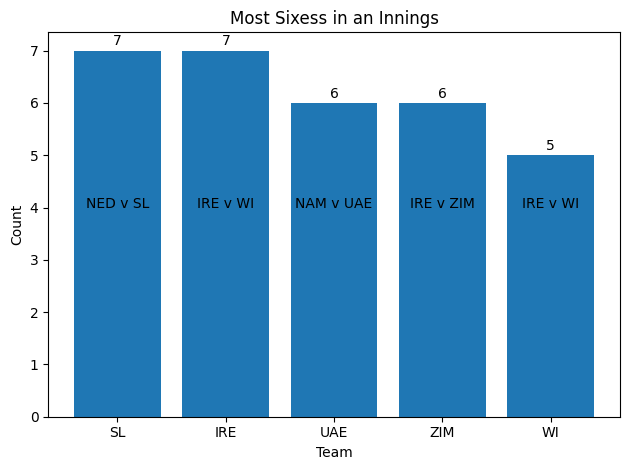

In [64]:
barplot(most_sixes_innings['Innings'], most_sixes_innings['Sixes'], 'Most Sixess in an Innings', 'Team', 'Count')
for i, v in zip(most_sixes_innings['Innings'], most_sixes_innings['match_name']):
    plt.text(i, 4, str(v), ha = 'center');

In [65]:
most_sixes_team = group.most_sixes_team().head()
most_sixes_team

,Team,Sixes
0,IRE,14
4,SL,12
6,WI,12
7,ZIM,11
5,UAE,10


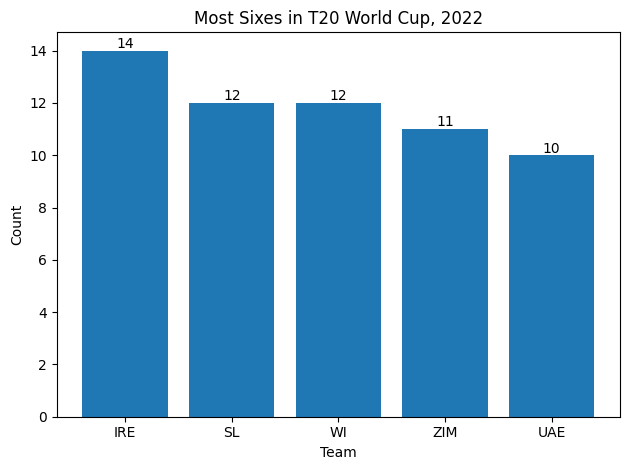

In [66]:
barplot(most_sixes_team['Team'], most_sixes_team['Sixes'], 'Most Sixes in T20 World Cup, 2022', 'Team', 'Count')

In [67]:
most_sixes_match = group.most_sixes_match().head()
most_sixes_match

,Match,Sixes
1,IRE v WI,12
2,IRE v ZIM,10
5,NAM v UAE,10
6,NED v SL,10
0,IRE v SCOT,7


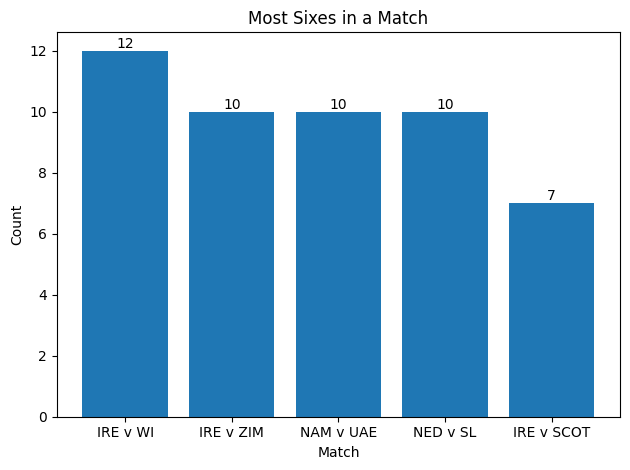

In [68]:
barplot(most_sixes_match['Match'], most_sixes_match['Sixes'], 'Most Sixes in a Match', 'Match', 'Count')

In [69]:
most_sixes_innings_player = group.most_sixes_innings_player().head()
most_sixes_innings_player

,match_name,Innings,Batsman,Sixes
31,NED v SL,SL,Kusal Mendis,5
15,IRE v ZIM,ZIM,Sikandar Raza,5
2,IRE v SCOT,SCOT,Michael Jones,3
4,IRE v WI,IRE,Andy Balbirnie,3
27,NAM v UAE,UAE,Muhammad Waseem,3


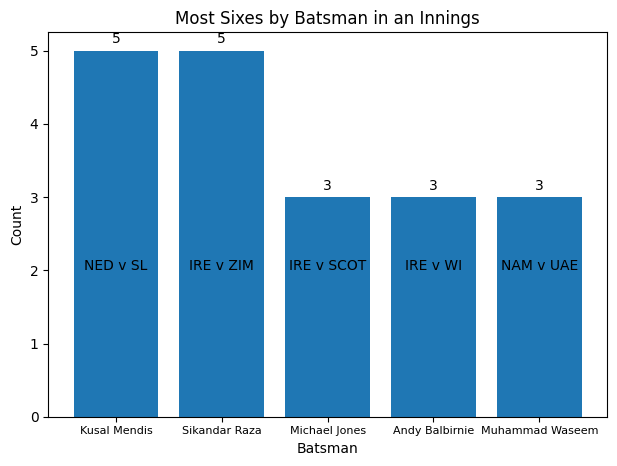

In [70]:
barplot(most_sixes_innings_player['Batsman'], most_sixes_innings_player['Sixes'], 'Most Sixes by Batsman in an Innings', 'Batsman', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_sixes_innings_player['Batsman'], most_sixes_innings_player['match_name']):
    plt.text(i, 2, str(v), ha = 'center');

In [71]:
most_sixes_team_player = group.most_sixes_team_player().head()
most_sixes_team_player

,Team,Batsman,Sixes
7,ZIM,Wessly Madhevere,8
4,SL,Pathum Nissanka,5
5,UAE,Muhammad Waseem,5
2,NED,Vikramjit Singh,4
0,IRE,Paul Stirling,3


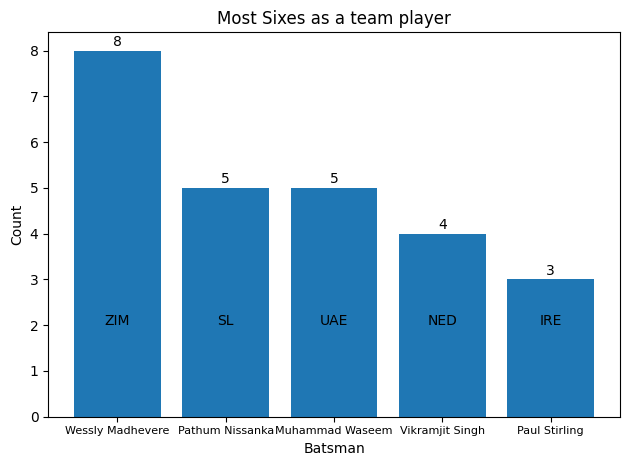

In [72]:
barplot(most_sixes_team_player['Batsman'], most_sixes_team_player['Sixes'], 'Most Sixes as a team player', 'Batsman', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_sixes_team_player['Batsman'], most_sixes_team_player['Team']):
    plt.text(i, 2, str(v), ha = 'center');

In [73]:
most_sixes_match_player = group.most_sixes_match_player().head()
most_sixes_match_player

,Match,Batsman,Sixes
15,IRE v ZIM,Sikandar Raza,5
30,NED v SL,Kusal Mendis,5
2,IRE v SCOT,Michael Jones,3
4,IRE v WI,Andy Balbirnie,3
26,NAM v UAE,Muhammad Waseem,3


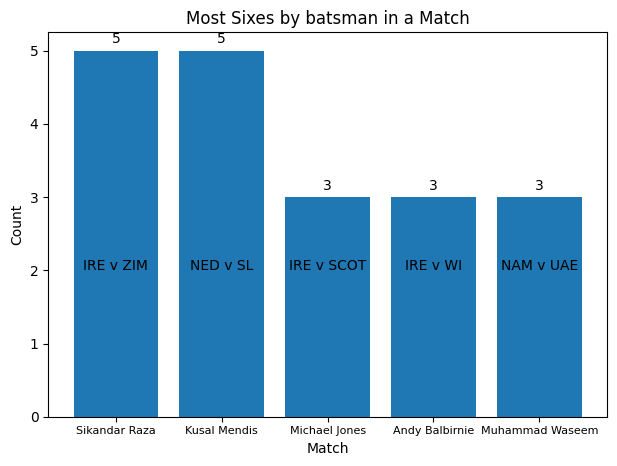

In [74]:
barplot(most_sixes_match_player['Batsman'], most_sixes_match_player['Sixes'], 'Most Sixes by batsman in a Match', 'Match', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_sixes_match_player['Batsman'], most_sixes_match_player['Match']):
    plt.text(i, 2, str(v), ha = 'center');

## Most Boundaries

In [75]:
most_boundaries_innings = group.most_boundaries_innings().head()
most_boundaries_innings

,Innings,Fours,Sixes,Boundaries
0,IRE,17,7,24
3,SCOT,18,4,22
7,ZIM,14,6,20
4,SL,12,7,19
2,NED,13,3,16


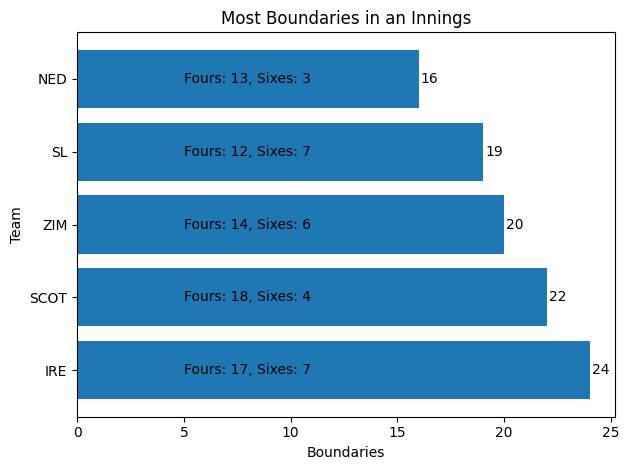

In [76]:
hbarplot(y = most_boundaries_innings['Innings'], width = most_boundaries_innings['Boundaries'], title = 'Most Boundaries in an Innings', xlabel = 'Boundaries', ylabel = 'Team')
string = [f'Fours: {f}, Sixes: {s}' for f, s in zip(most_boundaries_innings['Fours'], most_boundaries_innings['Sixes'])]

for i, v in zip(most_boundaries_innings['Innings'], string):
    plt.text(5, i, str(v), va = 'center')

In [77]:
most_boundaries_team = group.most_boundaries_team().head()
most_boundaries_team

,Team,Fours,Sixes,Boundaries
1,IRE,37,14,51
0,SCOT,45,5,50
2,ZIM,35,11,46
3,WI,30,12,42
4,SL,28,12,40


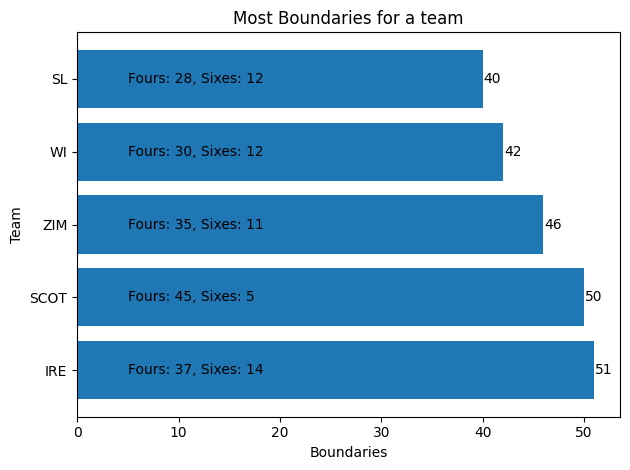

In [78]:
hbarplot(y = most_boundaries_team['Team'], width = most_boundaries_team['Boundaries'], title = 'Most Boundaries for a team', xlabel = 'Boundaries', ylabel = 'Team')
string = [f'Fours: {f}, Sixes: {s}' for f, s in zip(most_boundaries_team['Fours'], most_boundaries_team['Sixes'])]

for i, v in zip(most_boundaries_team['Team'], string):
    plt.text(5, i, str(v), va = 'center')

In [79]:
most_boundaries_match = group.most_boundaries_match().head()
most_boundaries_match

,Match,Fours,Sixes,Boundaries
0,IRE v SCOT,33,7,40
1,SCOT v WI,29,4,33
2,IRE v ZIM,23,10,33
3,NED v SL,23,10,33
4,IRE v WI,21,12,33


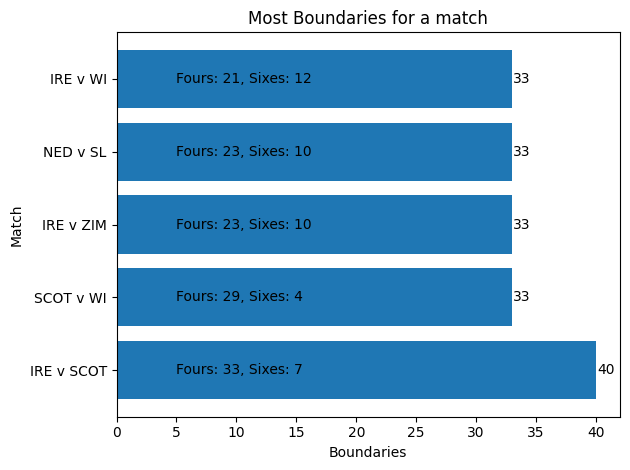

In [80]:
hbarplot(y = most_boundaries_match['Match'], width = most_boundaries_match['Boundaries'], title = 'Most Boundaries for a match', xlabel = 'Boundaries', ylabel = 'Match')
string = [f'Fours: {f}, Sixes: {s}' for f, s in zip(most_boundaries_match['Fours'], most_boundaries_match['Sixes'])]

for i, v in zip(most_boundaries_match['Match'], string):
    plt.text(5, i, str(v), va = 'center')

## Most single and doubles

In [81]:
most_single_innings = group.most_single_innings().head()
most_single_innings

,Match,Innings,Single
22,WI v ZIM,WI,58
8,NAM v SL,NAM,57
16,SCOT v WI,SCOT,55
19,SCOT v ZIM,ZIM,54
9,NAM v SL,SL,53


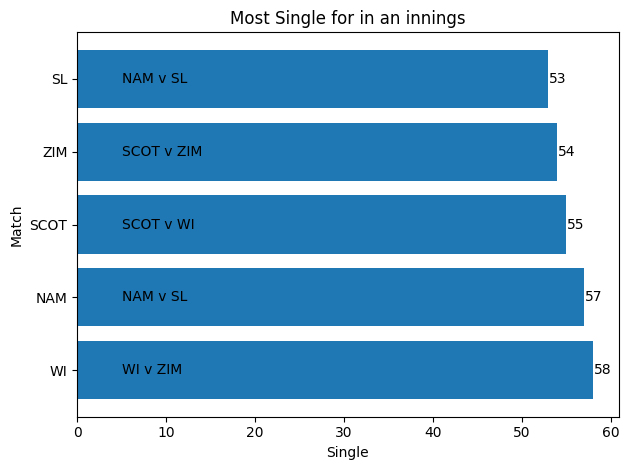

In [82]:
hbarplot(y = most_single_innings['Innings'], width = most_single_innings['Single'], title = 'Most Single for in an innings', xlabel = 'Single', ylabel = 'Match')

for i, v in zip(most_single_innings['Innings'], most_single_innings['Match']):
    plt.text(5, i, str(v), va = 'center')

In [83]:
most_single_team = group.most_single_team().head()
most_single_team

,Team,Single
1,NAM,156
3,SCOT,156
6,WI,152
2,NED,141
4,SL,140


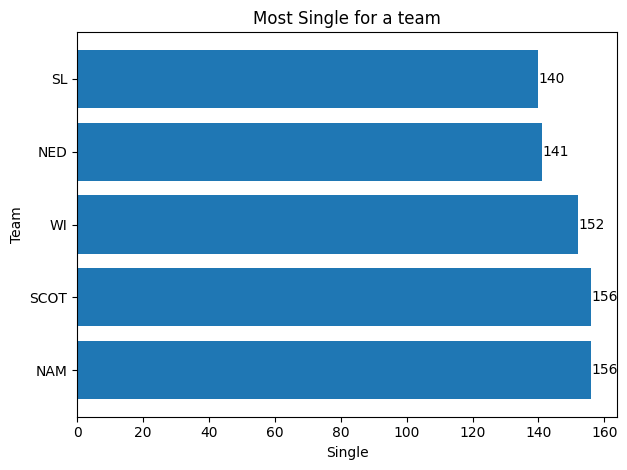

In [84]:
hbarplot(y = most_single_team['Team'], width = most_single_team['Single'], title = 'Most Single for a team', xlabel = 'Single', ylabel = 'Team')

In [85]:
most_single_match = group.most_single_match().head()
most_single_match

,Match,Single
4,NAM v SL,110
9,SCOT v ZIM,106
3,NAM v NED,102
7,NED v UAE,99
0,IRE v SCOT,98


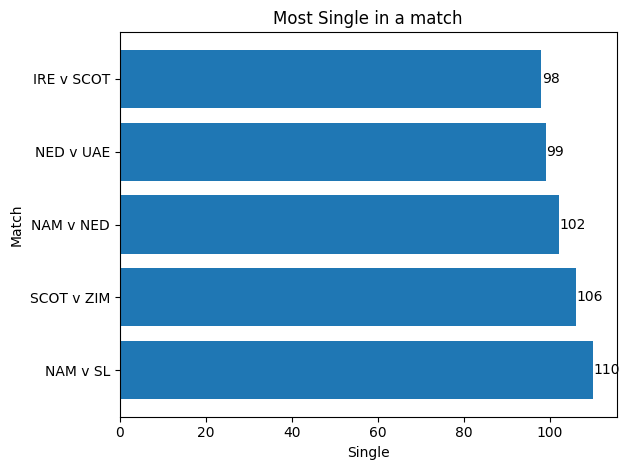

In [86]:
hbarplot(y = most_single_match['Match'], width = most_single_match['Single'], title = 'Most Single in a match', xlabel = 'Single', ylabel = 'Match')

### Double and tripples

In [87]:
most_double_innings = group.most_double_innings().head()
most_double_innings

,Match,Innings,Runs
13,NED v SL,SL,41
0,IRE v SCOT,IRE,36
6,NAM v NED,NAM,36
8,NAM v SL,NAM,33
11,NAM v UAE,UAE,33


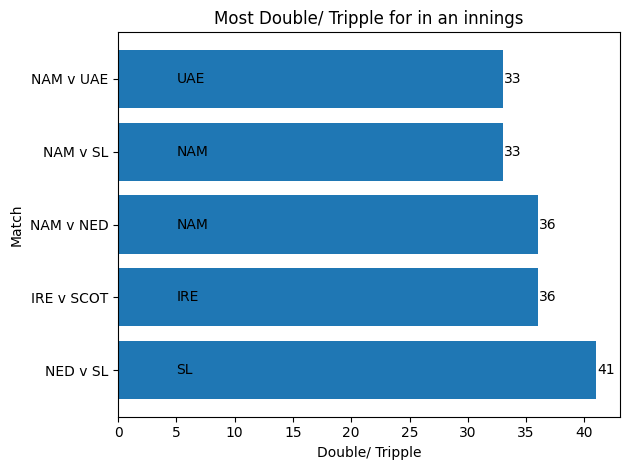

In [88]:
hbarplot(y = most_double_innings['Match'], width = most_double_innings['Runs'], title = 'Most Double/ Tripple for in an innings', xlabel = 'Double/ Tripple', ylabel = 'Match')

for i, v in zip(most_double_innings['Match'], most_double_innings['Innings']):
    plt.text(5, i, str(v), va = 'center')

In [89]:
most_double_team = group.most_double_team().head()
most_double_team

,Team,Runs
1,NAM,94
4,SL,85
0,IRE,80
5,UAE,77
2,NED,73


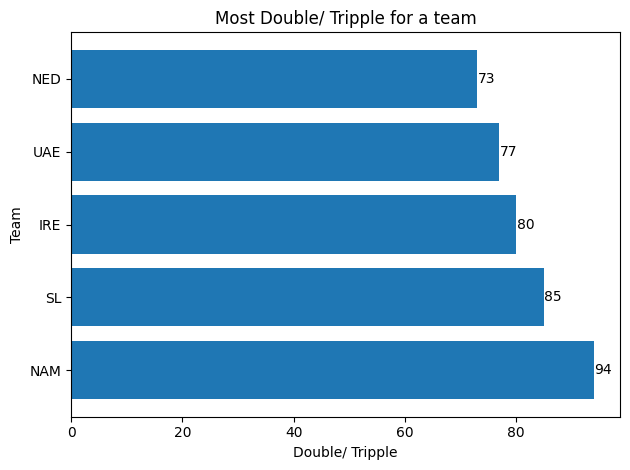

In [90]:
hbarplot(y = most_double_team['Team'], width = most_double_team['Runs'], title = 'Most Double/ Tripple for a team', xlabel = 'Double/ Tripple', ylabel = 'Team')

In [91]:
most_double_match = group.most_double_match().head()
most_double_match

,Match,Runs
6,NED v SL,68
0,IRE v SCOT,64
3,NAM v NED,58
5,NAM v UAE,58
7,NED v UAE,52


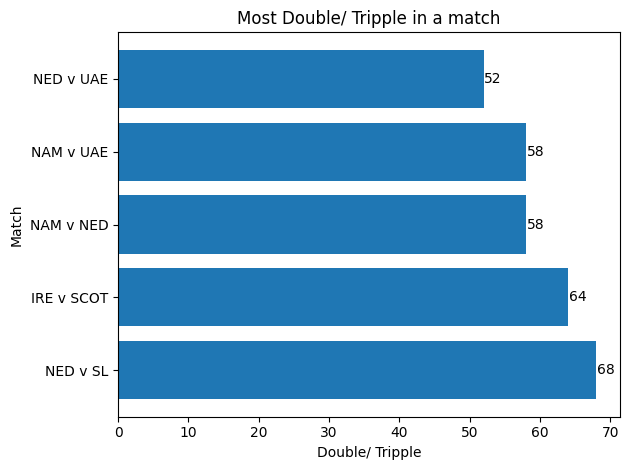

In [92]:
hbarplot(y = most_double_match['Match'], width = most_double_match['Runs'], title = 'Most Double/ Tripple in a match', xlabel = 'Double/ Tripple', ylabel = 'Match')

## Powerplay Analysis

In [93]:
most_run_power_team = group.most_run_power_team().head()
most_run_power_team

,Team,Runs
6,WI,143
3,SCOT,136
0,IRE,134
2,NED,133
4,SL,126


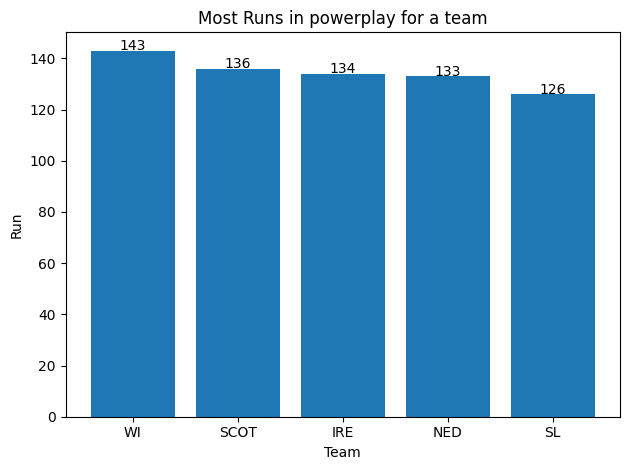

In [94]:
barplot(most_run_power_team['Team'], most_run_power_team['Runs'], 'Most Runs in powerplay for a team', 'Team', 'Run')


In [95]:
most_run_power_innings_team = group.most_run_power_innings_team().head()
most_run_power_innings_team

,Match,Team,Runs
2,IRE v WI,IRE,64
23,WI v ZIM,ZIM,55
16,SCOT v WI,SCOT,54
17,SCOT v WI,WI,53
20,SL v UAE,SL,52


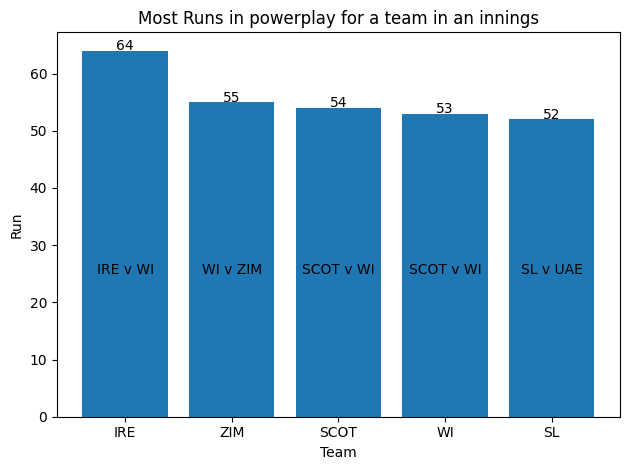

In [96]:
barplot(most_run_power_innings_team['Team'], most_run_power_innings_team['Runs'], 'Most Runs in powerplay for a team in an innings', 'Team', 'Run')
for i, v in zip(most_run_power_innings_team['Team'], most_run_power_innings_team['Match']):
    plt.text(i, 25, str(v), ha = 'center');

In [97]:
most_run_power_player = group.most_run_power_player().head()
most_run_power_player

,Batsman,Runs
16,George Munsey,59
39,Vikramjit Singh,53
41,Wessly Madhevere,49
26,Max O'Dowd,49
31,Pathum Nissanka,48


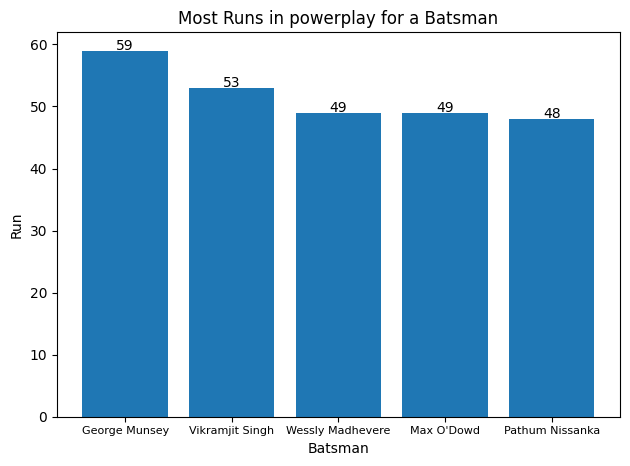

In [98]:
barplot(most_run_power_player['Batsman'], most_run_power_player['Runs'], 'Most Runs in powerplay for a Batsman', 'Batsman', 'Run')
plt.xticks(fontsize = 8);

In [99]:
most_run_power_match_player = group.most_run_power_match_player().head()
most_run_power_match_player

,Match,Batsman,Runs
30,NAM v NED,Vikramjit Singh,36
12,IRE v WI,Paul Stirling,32
7,IRE v WI,Andy Balbirnie,31
61,SCOT v WI,George Munsey,29
66,SCOT v ZIM,George Munsey,29


In [100]:
most_strike_power_team = group.most_strike_power_team().head()
most_strike_power_team

,Team,Runs,Strk Rate
6,WI,143,397.22
3,SCOT,136,377.78
0,IRE,134,372.22
2,NED,133,369.44
4,SL,126,350.00


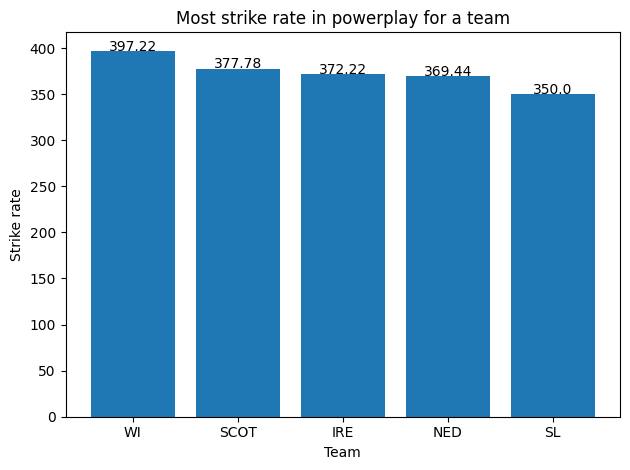

In [101]:
barplot(most_strike_power_team['Team'], most_strike_power_team['Strk Rate'], 'Most strike rate in powerplay for a team', 'Team', 'Strike rate');

In [102]:
most_strike_power_innings_team = group.most_strike_power_innings_team().head()
most_strike_power_innings_team

,Match,Team,Runs,Strk Rate
2,IRE v WI,IRE,64,177.78
23,WI v ZIM,ZIM,55,152.78
16,SCOT v WI,SCOT,54,150.00
17,SCOT v WI,WI,53,147.22
20,SL v UAE,SL,52,144.44


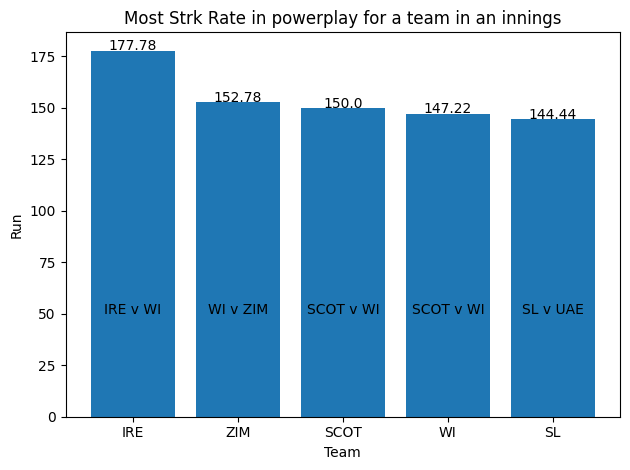

In [103]:
barplot(most_strike_power_innings_team['Team'], most_strike_power_innings_team['Strk Rate'], 'Most Strk Rate in powerplay for a team in an innings', 'Team', 'Run')
for i, v in zip(most_strike_power_innings_team['Team'], most_strike_power_innings_team['Match']):
    plt.text(i, 50, str(v), ha = 'center');

In [104]:
most_strike_power_player = group.most_strike_power_player().head()
most_strike_power_player

,Batsman,Runs,Strk Rate
16,George Munsey,59,163.89
39,Vikramjit Singh,53,147.22
41,Wessly Madhevere,49,136.11
26,Max O'Dowd,49,136.11
31,Pathum Nissanka,48,133.33


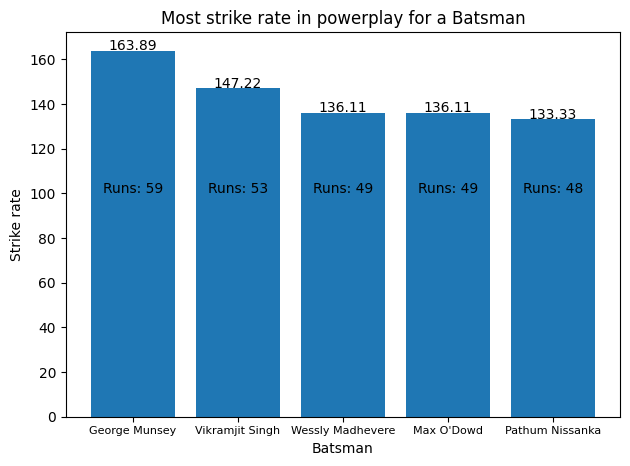

In [105]:
barplot(most_strike_power_player['Batsman'], most_strike_power_player['Strk Rate'], 'Most strike rate in powerplay for a Batsman', 'Batsman', 'Strike rate')
plt.xticks(fontsize = 8)
for i, v in zip(most_strike_power_player['Batsman'], most_strike_power_player['Runs']):
    plt.text(i, 100, f'Runs: {str(v)}', ha = 'center');

In [106]:
most_strike_power_match_player = group.most_strike_power_match_player()
most_strike_power_match_player = most_strike_power_match_player[most_strike_power_match_player['Runs'] >= 25].head()
most_strike_power_match_player

,Match,Batsman,Runs,Strk Rate
30,NAM v NED,Vikramjit Singh,36,100.00
12,IRE v WI,Paul Stirling,32,88.89
7,IRE v WI,Andy Balbirnie,31,86.11
61,SCOT v WI,George Munsey,29,80.56
66,SCOT v ZIM,George Munsey,29,80.56


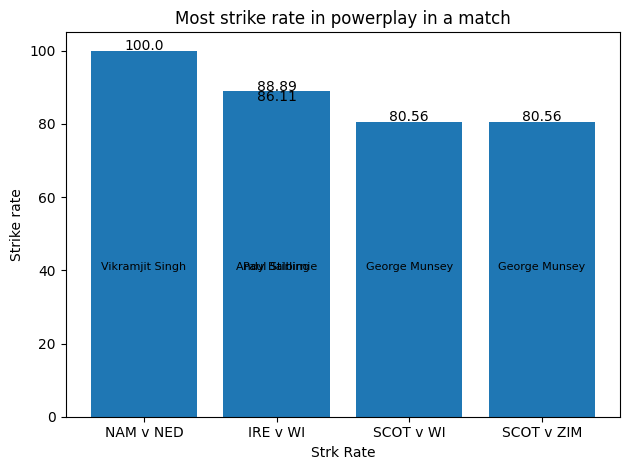

In [107]:
barplot(most_strike_power_match_player['Match'], most_strike_power_match_player['Strk Rate'], 'Most strike rate in powerplay in a match', 'Strk Rate', 'Strike rate')
# plt.xticks(fontsize = 8)
for i, v in zip(most_strike_power_match_player['Match'], most_strike_power_match_player['Batsman']):
    plt.text(i, 40, str(v), ha = 'center', fontdict={'size': 8});

In [108]:
most_wicket_power_innings_bowler = group.most_wicket_power_innings_bowler().head()
most_wicket_power_innings_bowler

,Match,Innings,Bowler,Wicket
30,SL v UAE,UAE,Dushmantha Chameera,3
17,NAM v UAE,NAM,Basil Hameed,2
33,WI v ZIM,ZIM,Alzarri Joseph,2
5,IRE v ZIM,IRE,Blessing Muzarabani,2
6,IRE v ZIM,IRE,Richard Ngarava,2


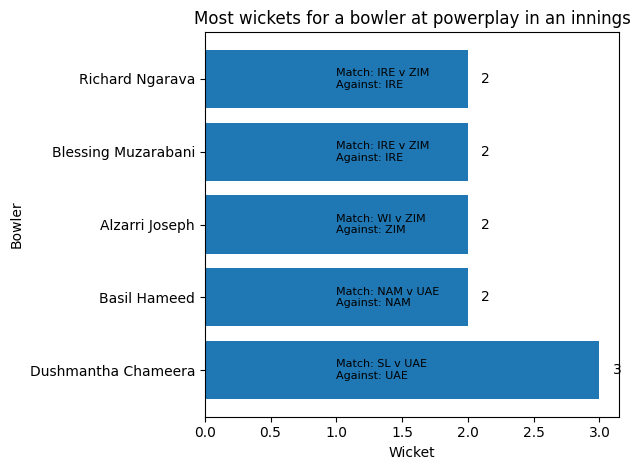

In [109]:
hbarplot(y = most_wicket_power_innings_bowler['Bowler'], width = most_wicket_power_innings_bowler['Wicket'], title = 'Most wickets for a bowler at powerplay in an innings', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Match: {m}\nAgainst: {i}' for m, i in zip(most_wicket_power_innings_bowler['Match'], most_wicket_power_innings_bowler['Innings'])]

for i, v in zip(most_wicket_power_innings_bowler['Bowler'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 8})

In [110]:
most_wicket_power_match_bowler = group.most_wicket_power_match_bowler().head()
most_wicket_power_match_bowler

,Match,Bowler,Wicket
30,SL v UAE,Dushmantha Chameera,3
12,NAM v SL,Ben Shikongo,2
32,WI v ZIM,Alzarri Joseph,2
5,IRE v ZIM,Blessing Muzarabani,2
6,IRE v ZIM,Josh Little,2


In [111]:
most_wicket_power_bowler = group.most_wicket_power_bowler().head()
most_wicket_power_bowler

,Bowler,Wicket
10,Dushmantha Chameera,4
3,Basil Hameed,3
20,Richard Ngarava,3
5,Blessing Muzarabani,3
6,Brad Wheal,3


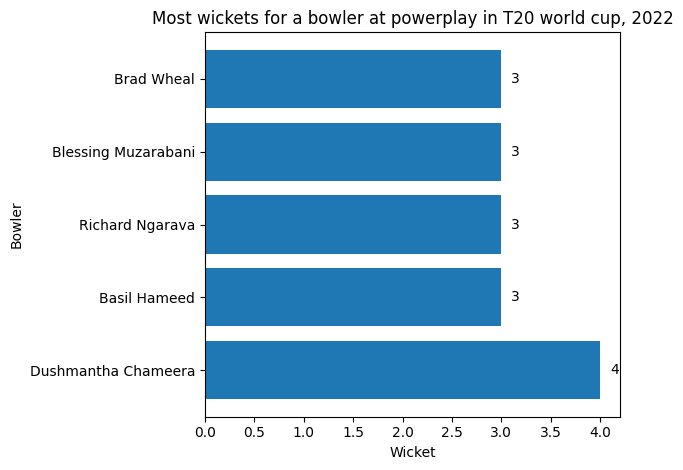

In [112]:
hbarplot(y = most_wicket_power_bowler['Bowler'], width = most_wicket_power_bowler['Wicket'], title = 'Most wickets for a bowler at powerplay in T20 world cup, 2022', xlabel = 'Wicket', ylabel = 'Bowler');

In [113]:
lowest_economy_power_bowler = group.lowest_economy_power_bowler()
lowest_economy_power_bowler = lowest_economy_power_bowler[lowest_economy_power_bowler['Over'] >= 4].head()
lowest_economy_power_bowler

,Bowler,Over,Wickets,Economy
18,Fred Klaassen,6.0,0,3.67
36,Pramod Madushan,5.0,2,4.80
43,Tim Pringle,4.0,1,5.00
17,Dushmantha Chameera,4.0,4,5.00
31,Mark Adair,4.0,1,5.00


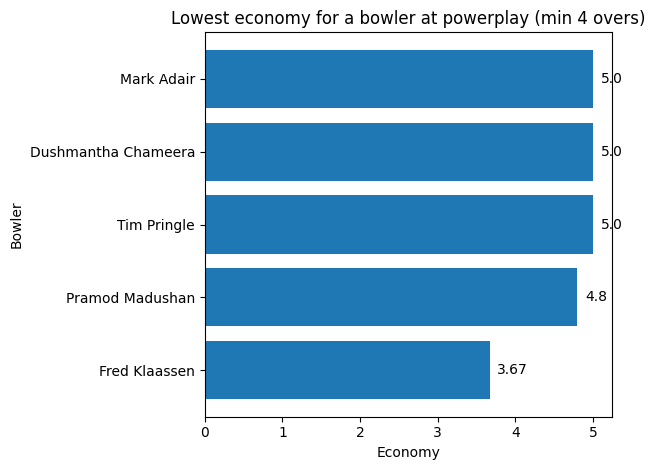

In [114]:
hbarplot(y = lowest_economy_power_bowler['Bowler'], width = lowest_economy_power_bowler['Economy'], title = 'Lowest economy for a bowler at powerplay (min 4 overs)', xlabel = 'Economy', ylabel = 'Bowler')

In [115]:
lowest_average_power_bowler = group.lowest_average_power_bowler()
lowest_average_power_bowler = lowest_average_power_bowler[lowest_average_power_bowler['Over'] >= 4].head()
lowest_average_power_bowler

,Bowler,Over,Wickets,Average
17,Dushmantha Chameera,4.0,4,5.00
6,Basil Hameed,4.0,3,8.00
36,Pramod Madushan,5.0,2,12.00
37,Richard Ngarava,6.0,3,12.33
11,Brad Wheal,7.0,3,12.33


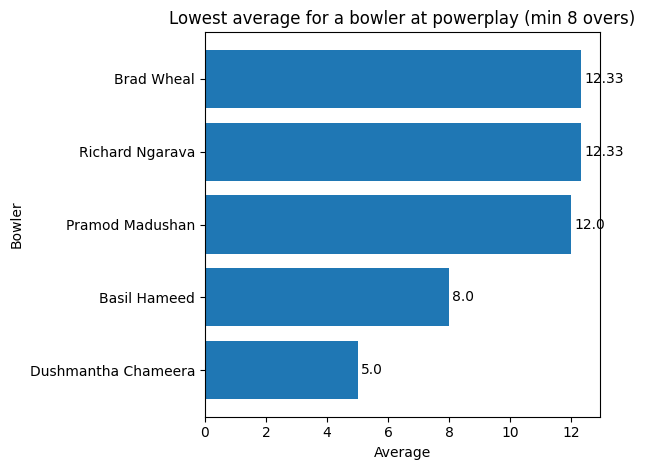

In [116]:
hbarplot(y = lowest_average_power_bowler['Bowler'], width = lowest_average_power_bowler['Average'], title = 'Lowest average for a bowler at powerplay (min 8 overs)', xlabel = 'Average', ylabel = 'Bowler')

In [117]:
most_out_power_batsman = group.most_out_power_batsman().head()
most_out_power_batsman

,Batsman,Out
19,Regis Chakabva,3
11,Kyle Mayers,3
0,Andy Balbirnie,2
10,Kusal Mendis,2
23,Vikramjit Singh,2


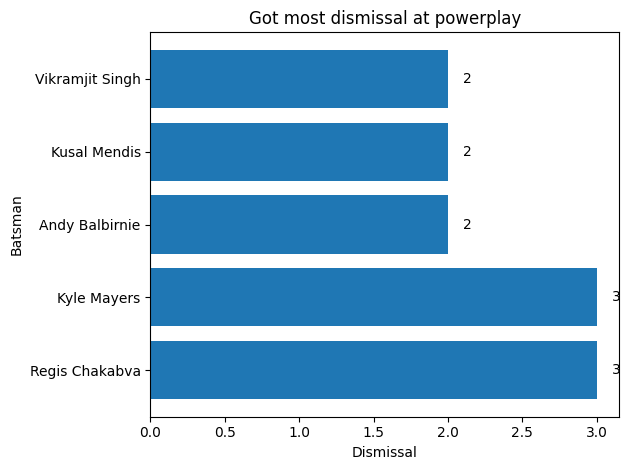

In [118]:
hbarplot(y = most_out_power_batsman['Batsman'], width = most_out_power_batsman['Out'], title = 'Got most dismissal at powerplay', xlabel = 'Dismissal', ylabel = 'Batsman')

## Death over analysis

In [119]:
most_run_death_team = group.most_run_death_team().head()
most_run_death_team

,Team,Runs
1,NAM,163
3,SCOT,137
0,IRE,113
6,WI,110
4,SL,105


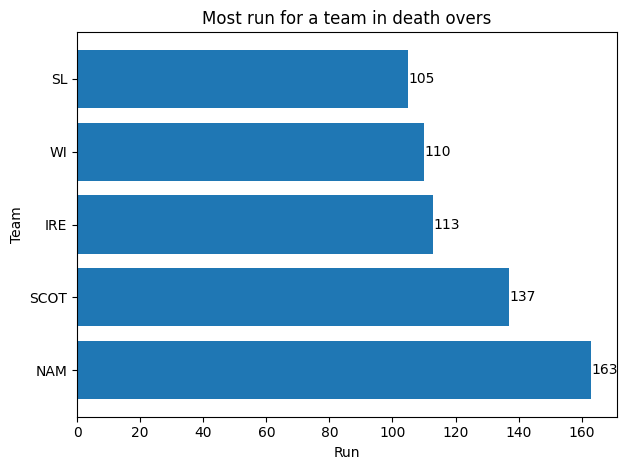

In [120]:
hbarplot(y = most_run_death_team['Team'], width = most_run_death_team['Runs'], title = 'Most run for a team in death overs', xlabel = 'Run', ylabel = 'Team')

In [121]:
most_run_death_innings_team = group.most_run_death_innings_team().head()
most_run_death_innings_team

,Match,Team,Runs
8,NAM v SL,NAM,68
0,IRE v SCOT,IRE,55
10,NAM v UAE,NAM,55
1,IRE v SCOT,SCOT,54
13,NED v SL,SL,53


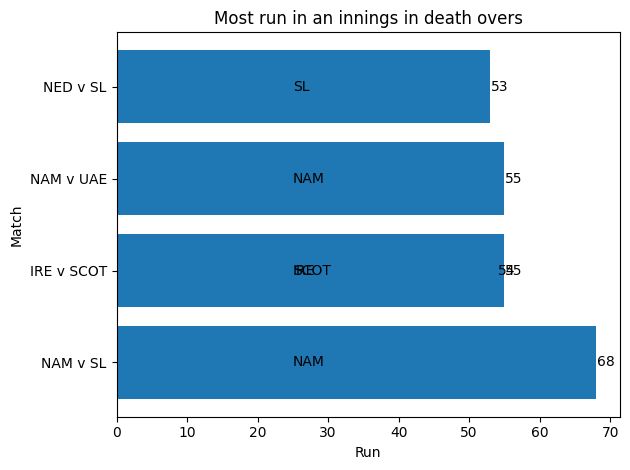

In [122]:
hbarplot(y = most_run_death_innings_team['Match'], width = most_run_death_innings_team['Runs'], title = 'Most run in an innings in death overs', xlabel = 'Run', ylabel = 'Match')
for i, v in zip(most_run_death_innings_team['Match'], most_run_death_innings_team['Team']):
    plt.text(25, i, str(v), va = 'center')

In [123]:
most_run_death_player = group.most_run_death_player().head()
most_run_death_player

,Batsman,Runs
25,Jan Frylinck,47
18,David Wiese,46
24,JJ Smit,43
16,Curtis Campher,39
36,Max O'Dowd,39


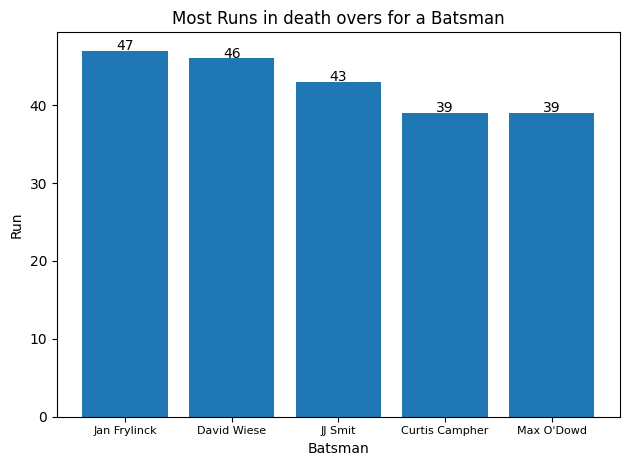

In [124]:
barplot(most_run_death_player['Batsman'], most_run_death_player['Runs'], 'Most Runs in death overs for a Batsman', 'Batsman', 'Run')
plt.xticks(fontsize = 8);

In [125]:
most_run_death_match_player = group.most_run_death_match_player().head()
most_run_death_match_player

,Match,Batsman,Runs
43,NED v SL,Max O'Dowd,39
1,IRE v SCOT,Curtis Campher,39
29,NAM v SL,JJ Smit,37
36,NAM v UAE,David Wiese,35
3,IRE v SCOT,Michael Jones,32


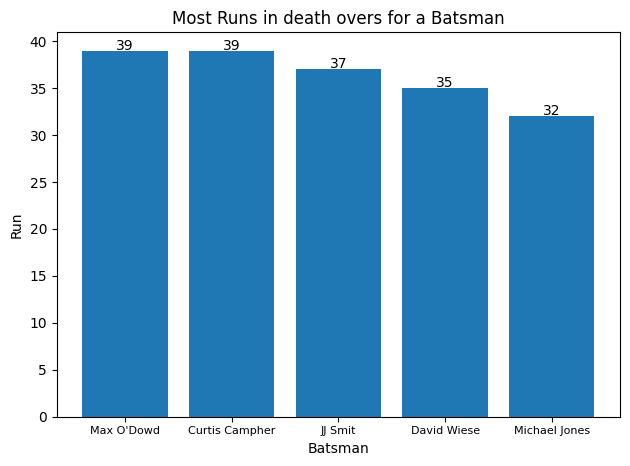

In [126]:
barplot(most_run_death_match_player['Batsman'], most_run_death_match_player['Runs'], 'Most Runs in death overs for a Batsman', 'Batsman', 'Run')
plt.xticks(fontsize = 8);

In [127]:
most_strike_death_team = group.most_strike_death_team().head()
most_strike_death_team

,Team,Runs,Strk Rate
1,NAM,163,171.58
0,IRE,113,156.94
3,SCOT,137,144.21
6,WI,110,127.91
5,UAE,93,124.00


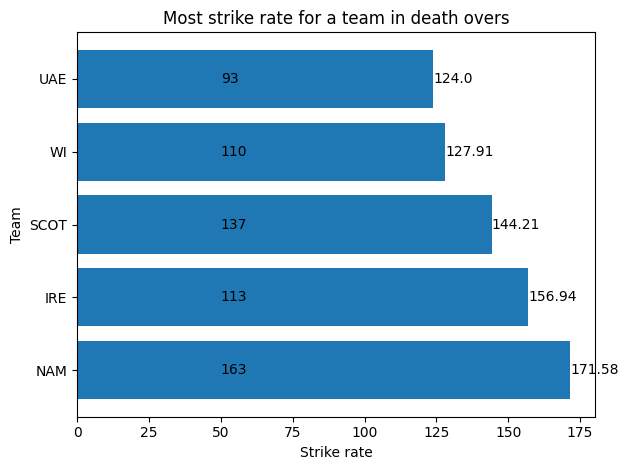

In [128]:
hbarplot(y = most_strike_death_team['Team'], width = most_strike_death_team['Strk Rate'], title = 'Most strike rate for a team in death overs', xlabel = 'Strike rate', ylabel = 'Team')
for i, v in zip(most_strike_death_team['Team'], most_strike_death_team['Runs']):
    plt.text(50, i, str(v), va = 'center')

In [129]:
most_strike_death_innings_team = group.most_strike_death_innings_team()
most_strike_death_innings_team = most_strike_death_innings_team[most_strike_death_innings_team['Runs'] >= 30].head()
most_strike_death_innings_team

,Match,Team,Runs,Strk Rate
0,IRE v SCOT,IRE,55,211.54
8,NAM v SL,NAM,68,206.06
10,NAM v UAE,NAM,55,183.33
13,NED v SL,SL,53,170.97
11,NAM v UAE,UAE,51,170.00


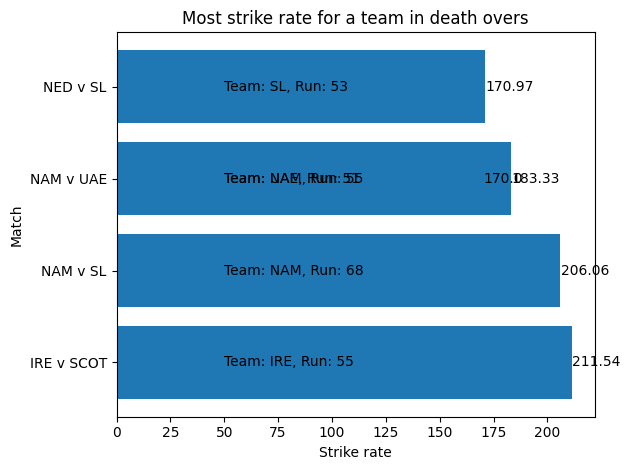

In [130]:
hbarplot(y = most_strike_death_innings_team['Match'], width = most_strike_death_innings_team['Strk Rate'], title = 'Most strike rate for a team in death overs', xlabel = 'Strike rate', ylabel = 'Match')
string = [f'Team: {t}, Run: {r}' for t, r in zip(most_strike_death_innings_team['Team'], most_strike_death_innings_team['Runs'])]
for i, v in zip(most_strike_death_innings_team['Match'], string):
    plt.text(50, i, str(v), va = 'center')

In [131]:
most_strike_death_player = group.most_strike_death_player()
most_strike_death_player = most_strike_death_player[most_strike_death_player['Runs'] >= 20].head()
most_strike_death_player

,Batsman,Runs,Strk Rate
37,Michael Jones,32,266.67
16,Curtis Campher,39,243.75
30,Kusal Mendis,21,233.33
18,David Wiese,46,219.05
33,Luke Jongwe,37,217.65


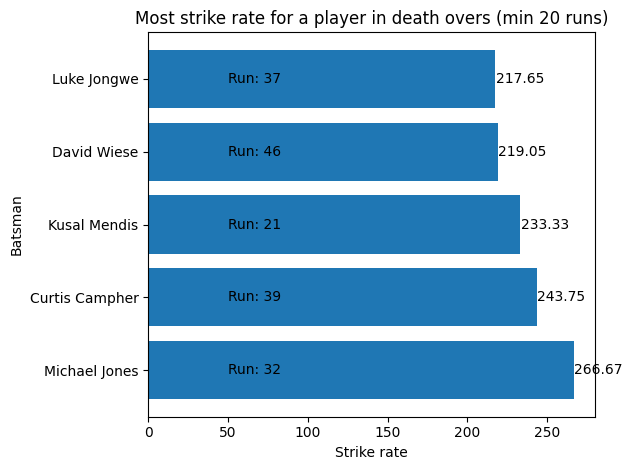

In [132]:
hbarplot(y = most_strike_death_player['Batsman'], width = most_strike_death_player['Strk Rate'], title = 'Most strike rate for a player in death overs (min 20 runs)', xlabel = 'Strike rate', ylabel = 'Batsman')
for i, v in zip(most_strike_death_player['Batsman'], most_strike_death_player['Runs']):
    plt.text(50, i, f'Run: {str(v)}', va = 'center');

In [133]:
most_strike_death_match_player = group.most_strike_death_match_player()
most_strike_death_match_player = most_strike_death_match_player[most_strike_death_match_player['Runs'] >= 10].head()
most_strike_death_match_player

,Match,Batsman,Runs,Strk Rate
81,WI v ZIM,Luke Jongwe,16,94.12
42,NED v SL,Kusal Mendis,21,87.50
3,IRE v SCOT,Michael Jones,32,72.73
36,NAM v UAE,David Wiese,35,70.00
35,NAM v UAE,Chundangapoyil Rizwan,22,68.75


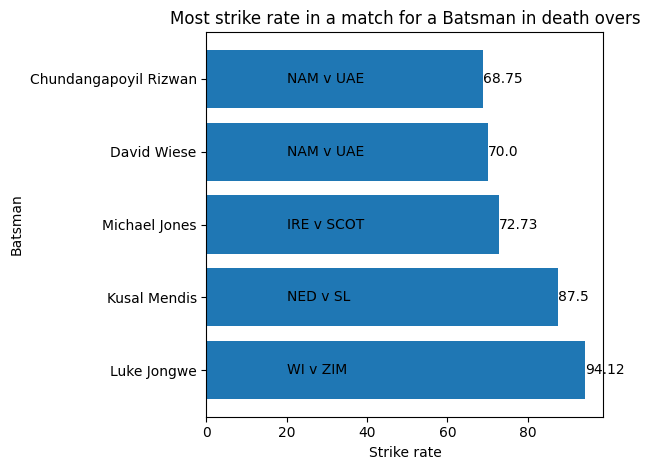

In [134]:
hbarplot(y = most_strike_death_match_player['Batsman'], width = most_strike_death_match_player['Strk Rate'], title = 'Most strike rate in a match for a Batsman in death overs', xlabel = 'Strike rate', ylabel = 'Batsman')
for i, v in zip(most_strike_death_match_player['Batsman'], most_strike_death_match_player['Match']):
    plt.text(20, i, str(v), va = 'center')

In [135]:
most_wicket_death_innings_bowler = group.most_wicket_death_innings_bowler().head()
most_wicket_death_innings_bowler

,Match,Innings,Bowler,Wicket
18,NED v UAE,UAE,Bas de Leede,3
32,WI v ZIM,ZIM,Alzarri Joseph,2
29,SL v UAE,SL,Zahoor Khan,2
6,NAM v NED,NAM,Bas de Leede,2
7,NAM v NED,NED,JJ Smit,2


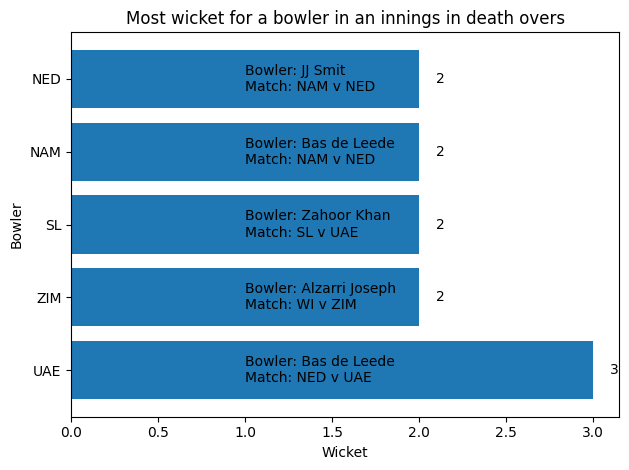

In [136]:
hbarplot(y = most_wicket_death_innings_bowler['Innings'], width = most_wicket_death_innings_bowler['Wicket'], title = 'Most wicket for a bowler in an innings in death overs', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Bowler: {b}\nMatch: {m}' for b, m in zip(most_wicket_death_innings_bowler['Bowler'], most_wicket_death_innings_bowler['Match'])]
for i, v in zip(most_wicket_death_innings_bowler['Innings'], string):
    plt.text(1, i, str(v), va = 'center')

In [137]:
most_wicket_death_match_bowler = group.most_wicket_death_match_bowler().head()
most_wicket_death_match_bowler

,Match,Bowler,Wicket
7,NED v UAE,Zahoor Khan,3
3,NAM v NED,Jan Frylinck,2
6,NED v SL,Wanindu Hasaranga de Silva,2
10,SL v UAE,Zahoor Khan,2
11,WI v ZIM,Jason Holder,2


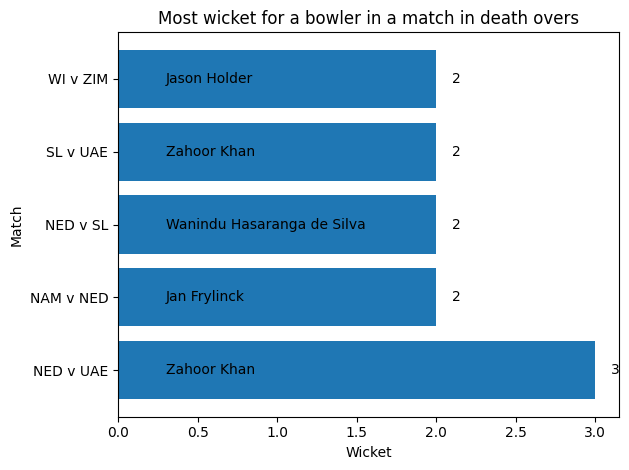

In [138]:
hbarplot(y = most_wicket_death_match_bowler['Match'], width = most_wicket_death_match_bowler['Wicket'], title = 'Most wicket for a bowler in a match in death overs', xlabel = 'Wicket', ylabel = 'Match')
for i, v in zip(most_wicket_death_match_bowler['Match'], most_wicket_death_match_bowler['Bowler']):
    plt.text(0.3, i, str(v), va = 'center')

In [139]:
most_wicket_death_bowler = group.most_wicket_death_bowler().head()
most_wicket_death_bowler

,Bowler,Wicket
2,Bas de Leede,6
22,Zahoor Khan,3
8,JJ Smit,3
3,Blessing Muzarabani,3
6,Fred Klaassen,3


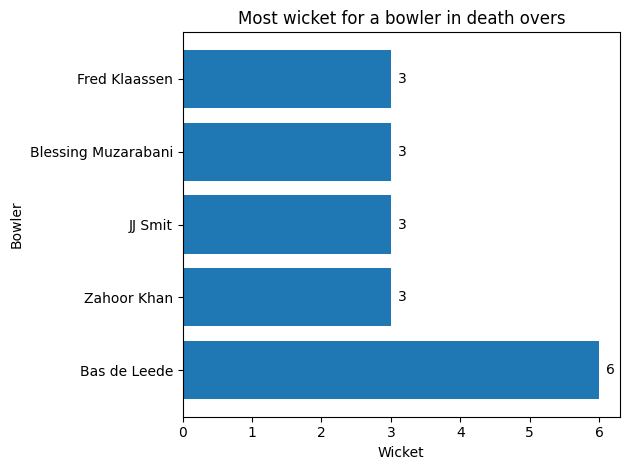

In [140]:
hbarplot(y = most_wicket_death_bowler['Bowler'], width = most_wicket_death_bowler['Wicket'], title = 'Most wicket for a bowler in death overs', xlabel = 'Wicket', ylabel = 'Bowler')

In [141]:
lowest_economy_death_bowler = group.lowest_economy_death_bowler()
lowest_economy_death_bowler = lowest_economy_death_bowler[lowest_economy_death_bowler['Over'] >= 8].head()
lowest_economy_death_bowler

,Bowler,Over,Wickets,Economy
40,Zahoor Khan,12.0,5,4.75
15,Jan Frylinck,8.0,3,5.25
29,Paul van Meekeren,12.0,3,5.33
37,Tendai Chatara,10.5,4,5.43
24,Mark Watt,12.0,5,5.83


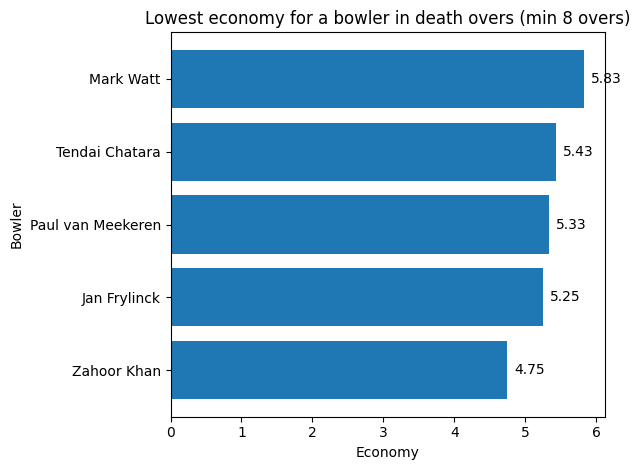

In [142]:
hbarplot(y = lowest_economy_death_bowler['Bowler'], width = lowest_economy_death_bowler['Economy'], title = 'Lowest economy for a bowler in death overs (min 8 overs)', xlabel = 'Economy', ylabel = 'Bowler')

In [143]:
lowest_average_death_bowler = group.lowest_average_death_bowler()
lowest_average_death_bowler = lowest_average_death_bowler[lowest_average_death_bowler['Over'] >= 8].head()
lowest_average_death_bowler

,Bowler,Over,Wickets,Average
3,Bas de Leede,9.0,7,9.71
40,Zahoor Khan,12.0,5,11.40
39,Wanindu Hasaranga de Silva,8.0,4,13.75
1,Alzarri Joseph,12.0,6,13.83
24,Mark Watt,12.0,5,14.00


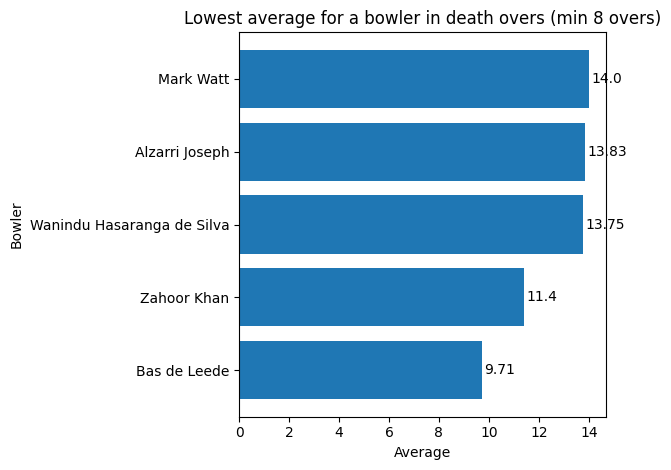

In [144]:
hbarplot(y = lowest_average_death_bowler['Bowler'], width = lowest_average_death_bowler['Average'], title = 'Lowest average for a bowler in death overs (min 8 overs)', xlabel = 'Average', ylabel = 'Bowler')

In [145]:
most_out_death_batsman = group.most_out_death_batsman().head()
most_out_death_batsman

,Batsman,Out
28,Rovman Powell,2
21,Michael Leask,2
3,Calum MacLeod,2
4,Chamika Karunaratne,2
14,Jan Frylinck,2


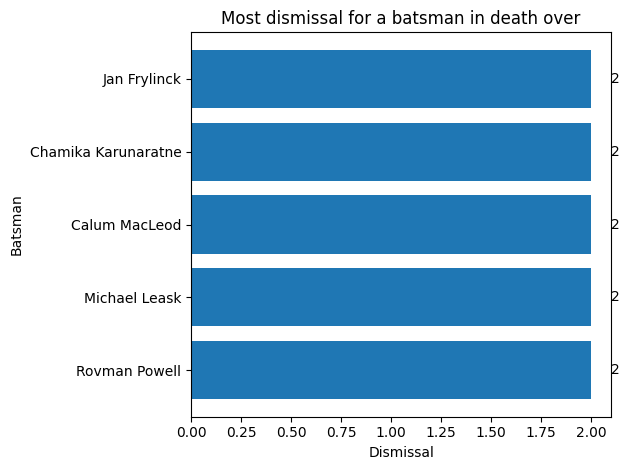

In [146]:
hbarplot(y = most_out_death_batsman['Batsman'], width = most_out_death_batsman['Out'], title = 'Most dismissal for a batsman in death over', xlabel = 'Dismissal', ylabel = 'Batsman')